In [509]:
%matplotlib inline
import os

EXPERIMENT_DIR='/mnt/data/jemmons/vfeedbacknet-results/'

In [568]:
import matplotlib.pyplot as plt

def get_data(training_csv):
    with open(training_csv, 'r') as f:
        lines = f.read().strip().split('\n')
        lines = list(filter(lambda x : 'OVERFIT' not in x, lines))
        lines = list(filter(lambda x : '#' not in x, lines))
        lines = list(filter(lambda x : 'batch_num' not in x, lines))
        #lines = lines[7:] # strip away the logging information
        
        #header = lines[0]
        #assert len(header.split(', ')) == 15, 'expected 15 columns in header but got {}'.format(len(header.split(', ')))
        #print(header)
        #lines = lines[1:]
        
        data = []
        for line in lines:
            try:  
                #batch_num, epoch, global_step, learning_rate, feedback_iteration, train_acc_top1, train_acc_top3, train_acc_top5, train_loss, valid_acc_top1, valid_acc_top3, valid_acc_top5, valid_loss, checkpoint_path, model_export_path
                n, epoch, step, lr, fb, tr_top1, tr_top3, tr_top5, tr_loss, te_top1, te_top3, te_top5, te_loss, ckpt, ckpt_npz = line.split(',')
                d = {
                        'batch_num' : int(n),
                        'learning_rate' : float(lr),
                        'feedback_iteration' : int(fb),
                        'train_top1_acc' : float(tr_top1) if not tr_top1.isspace() else None,
                        'train_top3_acc' : float(tr_top3) if not tr_top3.isspace() else None,
                        'train_top5_acc' : float(tr_top5) if not tr_top5.isspace() else None,
                        'train_loss' : float(tr_loss) if not tr_loss.isspace() else None,
                        'test_top1_acc' : float(te_top1) if not te_top1.isspace() else None,
                        'test_top3_acc' : float(te_top3) if not te_top3.isspace() else None,
                        'test_top5_acc' : float(te_top5) if not te_top5.isspace() else None,
                        'test_loss' : float(te_loss) if not te_loss.isspace() else None,
                        'checkpoint' : ckpt_npz
                    }
                data.append(d)
            except:
                print('error processing:', line)
                raise 'processing error'
                
        print('bn, epoch, step, lr, fb, tr1, tr3, tr5, trL, te1, te3, te5, teL')
        print('\n'.join(lines[-9:]))
        print('batch_num:', max(list(map(lambda x: x['batch_num'], data))))
        
        return None, data
    
def get_data_legacy(training_csv):
    with open(training_csv, 'r') as f:
        lines = f.read().strip().split('\n')
        lines = list(filter(lambda x : 'OVERFIT' not in x, lines))
        lines = list(filter(lambda x : '#' not in x, lines))
        lines = list(filter(lambda x : 'batch_num' not in x, lines))
        #lines = lines[7:] # strip away the logging information
        
        #header = lines[0]
        #assert len(header.split(', ')) == 15, 'expected 15 columns in header but got {}'.format(len(header.split(', ')))
        #print(header)
        #lines = lines[1:]
        
        data = []
        for line in lines:
            try:  
                n, lr, tr_top1, tr_top3, tr_top5, tr_loss, te_top1, te_top3, te_top5, te_loss = line.split(',')
                te_loss = ' ' if te_loss == '' else te_loss
                d = {
                        'batch_num' : int(n),
                        'learning_rate' : float(lr),
                        'feedback_iteration' : 0,
                        #'feedback_iteration' : int(fb),
                        'train_top1_acc' : float(tr_top1) if not tr_top1.isspace() else None,
                        'train_top3_acc' : float(tr_top3) if not tr_top3.isspace() else None,
                        'train_top5_acc' : float(tr_top5) if not tr_top5.isspace() else None,
                        'train_loss' : float(tr_loss) if not tr_loss.isspace() else None,
                        'test_top1_acc' : float(te_top1) if not te_top1.isspace() else None,
                        'test_top3_acc' : float(te_top3) if not te_top3.isspace() else None,
                        'test_top5_acc' : float(te_top5) if not te_top5.isspace() else None,
                        'test_loss' : float(te_loss) if not te_loss.isspace() else None,
                        'checkpoint' : 'None'
                    }
                data.append(d)
            except:
                print('error processing:', line)
                print(line.split(','))
                raise 'processing error'
        
        #print(data)
        print('bn, epoch, step, lr, fb, tr1, tr3, tr5, trL, te1, te3, te5, teL')
        print('\n'.join(lines[-1:]))
        print('batch_num:', max(list(map(lambda x: x['batch_num'], data))))
        
        return None, data
    
def plot_accuracy(data, num_feedback=1, ylim=None):
    try:  
        fig = plt.figure(figsize=(15, 5))
  
        train_colors = ["#555555", "#777777", "#bababa"]
        test_color = ["#6da5ff", "#99c0ff", "#c4e3ff"]
        
        test_acc_ = list(filter(lambda x : x['test_top1_acc'] is not None, data))
        if len(test_acc_) > 0:
            print('test accuracys (top-1):', list(map(lambda x: x['test_top1_acc'], test_acc_[-num_feedback:])))
            print('checkpoint (if available):', test_acc_[-1]['checkpoint'].lstrip().strip())
        
        plot_data = []
        for i in range(num_feedback):
            data_ = list(filter(lambda x: x['feedback_iteration'] == i, data))
            
            train_acc = list(filter(lambda x : x['train_top1_acc'] is not None, data_))
            train_acc_x = list(map(lambda x : x['batch_num'], train_acc))
            train_acc1_y = list(map(lambda x : x['train_top1_acc'], train_acc))
            train_acc3_y = list(map(lambda x : x['train_top3_acc'], train_acc))
            train_acc5_y = list(map(lambda x : x['train_top5_acc'], train_acc))

            test_acc = list(filter(lambda x : x['test_top1_acc'] is not None, data_))
            test_acc_x = list(map(lambda x : x['batch_num'], test_acc))
            test_acc1_y = list(map(lambda x : x['test_top1_acc'], test_acc))
            test_acc3_y = list(map(lambda x : x['test_top3_acc'], test_acc))
            test_acc5_y = list(map(lambda x : x['test_top5_acc'], test_acc))
    
            plot_data.append({
                'train_x' : train_acc_x,
                'train_acc1' : train_acc1_y,
                'train_acc3': train_acc3_y,
                'train_acc5': train_acc5_y,
                'test_x' : test_acc_x,
                'test_acc1' : test_acc1_y,
                'test_acc3': test_acc3_y,
                'test_acc5': test_acc5_y,
            })
                    
        plot_data.reverse()
            
        # plot top-1
        ax1 = fig.add_subplot(131)
        ax1.set_ylim([0, ylim])
        ax1.set_title('Top-1 Accuracy\n(black = train, blue = validation\ndarker => more feedback)')
        ax1.set_xlabel('Batch number')
        ax1.set_ylabel('Top-1 Accuracy')
        for i in range(num_feedback):
            d = plot_data[i]
            train_c = train_colors[i]
            ax1.plot(d['train_x'], d['train_acc1'],  color=train_c, ls="-", marker="o")
            
        for i in range(num_feedback):
            d = plot_data[i]
            test_c = test_color[i]
            ax1.plot(d['test_x'], d['test_acc1'], color=test_c, ls="-", marker="o")

        # plot top-3
        ax2 = fig.add_subplot(132)
        ax2.set_ylim([0, ylim if ylim is not None else 1.1*max(max(train_acc3_y), max(test_acc3_y))])
        ax2.set_title('Top-3 Accuracy\n(black = train, blue = validation\ndarker => more feedback)')
        ax2.set_xlabel('Batch number')
        ax2.set_ylabel('Top-3 Accuracy')
        for i in range(num_feedback):
            d = plot_data[i]
            train_c = train_colors[i]
            ax2.plot(d['train_x'], d['train_acc3'],  color=train_c, ls="-", marker="o")
            
        for i in range(num_feedback):
            d = plot_data[i]
            test_c = test_color[i]
            ax2.plot(d['test_x'], d['test_acc3'], color=test_c, ls="-", marker="o")

        # plot top-5
        ax3 = fig.add_subplot(133)
        ax3.set_ylim([0, ylim if ylim is not None else 1.1*max(max(train_acc5_y), max(test_acc5_y))])
        ax3.set_title('Top-5 Accuracy\n(black = train, blue = validation\ndarker => more feedback)')
        ax3.set_xlabel('Batch number')
        ax3.set_ylabel('Top-5 Accuracy')           
        for i in range(num_feedback):
            d = plot_data[i]
            train_c = train_colors[i]
            ax3.plot(d['train_x'], d['train_acc5'],  color=train_c, ls="-", marker="o")
            
        for i in range(num_feedback):
            d = plot_data[i]
            test_c = test_color[i]
            ax3.plot(d['test_x'], d['test_acc5'], color=test_c, ls="-", marker="o")     

    except: 
        pass
    
    plt.tight_layout()
    
    
def plot_loss(data):
    try:
        fig = plt.figure(figsize=(10, 5))
        train_loss = list(filter(lambda x : x['train_loss'] is not None, data))
        train_loss_x = list(map(lambda x : x['batch_num'], train_loss))
        train_loss_y = list(map(lambda x : x['train_loss'], train_loss))

        ax1 = fig.add_subplot(121)
        ax1.set_ylim([0, 1.1*max(train_loss_y)])
        ax1.set_title('Training Loss')
        ax1.set_xlabel('Batch number')
        ax1.set_ylabel('Loss value')
        ax1.plot(train_loss_x, train_loss_y, color="#555555", ls="-", marker="o")

        test_loss = list(filter(lambda x : x['test_loss'] is not None, data))
        test_loss_x = list(map(lambda x : x['batch_num'], test_loss))
        test_loss_y = list(map(lambda x : x['test_loss'], test_loss))
        ax2 = fig.add_subplot(122)
        ax2.set_ylim([0, 1.1*max(test_loss_y)])
        ax2.set_title('Validation Loss')
        ax2.set_xlabel('Minibatch number')
        ax2.set_ylabel('Loss value')
        ax2.plot(test_loss_x, test_loss_y, color="#6da5ff", ls="-", marker="o")
    
    except:
        pass
    
    plt.tight_layout()

    
def plot_learning_rate(data):
    try:
        fig = plt.figure(figsize=(5, 5))
        batch_num = list(map(lambda x : x['batch_num'], data))
        learning_rate = list(map(lambda x : x['learning_rate'], data))

        ax1 = fig.add_subplot(111)
        ax1.set_ylim([min(0.0005, 0.98*min(learning_rate)), 1.1*max(learning_rate)])
        ax1.set_title('Learning Rate')
        ax1.set_xlabel('Batch number')
        ax1.set_ylabel('Learning Rate')
        ax1.semilogy(batch_num, learning_rate, color="#555555", ls="-", marker="o")

    except:
        pass
 
    plt.tight_layout()

bn, epoch, step, lr, fb, tr1, tr3, tr5, trL, te1, te3, te5, teL
9, 0, 423, 0.09429348260164261, 0, 0.4046296296296296, 0.6537037037037037, 0.7462962962962963, 1321113.830078125, , , , , ,
9, 0, 423, 0.09429348260164261, 1, 0.45925925925925926, 0.6925925925925925, 0.7898148148148149, 1321113.830078125, , , , , ,
9, 0, 423, 0.09429348260164261, 2, 0.4722222222222222, 0.7046296296296296, 0.7953703703703704, 1321113.830078125, , , , , ,
9, 0, 423, 0.09428035467863083, 0, , , , , 0.22623456790123456, 0.3907407407407407, 0.49290123456790125, 3956865.609375, /mnt/data/jemmons/vfeedbacknet-results/ucf-101/vfeedbacknet_model22/tf_checkpoint-epoch0-batch-minibatch107, /mnt/data/jemmons/vfeedbacknet-results/ucf-101/vfeedbacknet_model22/model_weights-epoch0-step107.npz
9, 0, 423, 0.09428035467863083, 1, , , , , 0.2441358024691358, 0.4361111111111111, 0.5345679012345679, 3956865.609375, /mnt/data/jemmons/vfeedbacknet-results/ucf-101/vfeedbacknet_model22/tf_checkpoint-epoch0-batch-minibatch107, /mnt

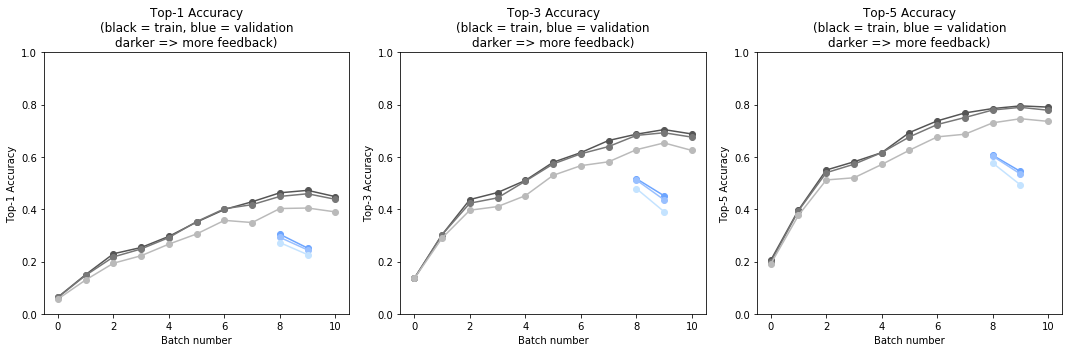

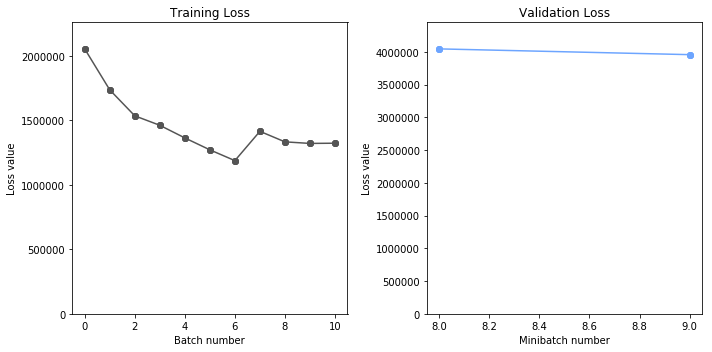

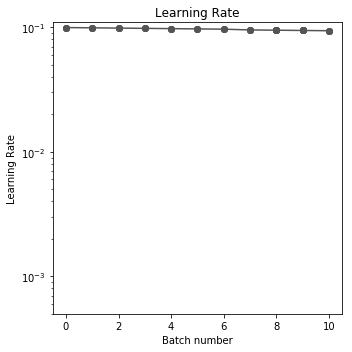

In [636]:
# Name: feedback network 
header, data = get_data(os.path.join(EXPERIMENT_DIR, 'ucf-101/vfeedbacknet_model22', 'training_log.csv'))
plot_accuracy(data, num_feedback=3, ylim=1)
plot_loss(data)
plot_learning_rate(data)

bn, epoch, step, lr, fb, tr1, tr3, tr5, trL, te1, te3, te5, teL
801, 8, 6416, 0.02007719688117504, 0, , , , , 0.037862141927083336, 0.08343505859375, 0.11505126953125, 93796761600.0, /mnt/data/jemmons/vfeedbacknet-results/imagenet/vfeedbacknet_fb_base2/tf_checkpoint-epoch8-batch-minibatch-1, /mnt/data/jemmons/vfeedbacknet-results/imagenet/vfeedbacknet_fb_base2/model_weights-epoch8-step-1.npz
801, 8, 6416, 0.02007719688117504, 1, , , , , 0.046223958333333336, 0.09912109375, 0.1368408203125, 93796761600.0, /mnt/data/jemmons/vfeedbacknet-results/imagenet/vfeedbacknet_fb_base2/tf_checkpoint-epoch8-batch-minibatch-1, /mnt/data/jemmons/vfeedbacknet-results/imagenet/vfeedbacknet_fb_base2/model_weights-epoch8-step-1.npz
801, 8, 6416, 0.02007719688117504, 2, , , , , 0.050089518229166664, 0.10618082682291667, 0.14656575520833334, 93796761600.0, /mnt/data/jemmons/vfeedbacknet-results/imagenet/vfeedbacknet_fb_base2/tf_checkpoint-epoch8-batch-minibatch-1, /mnt/data/jemmons/vfeedbacknet-results/imag

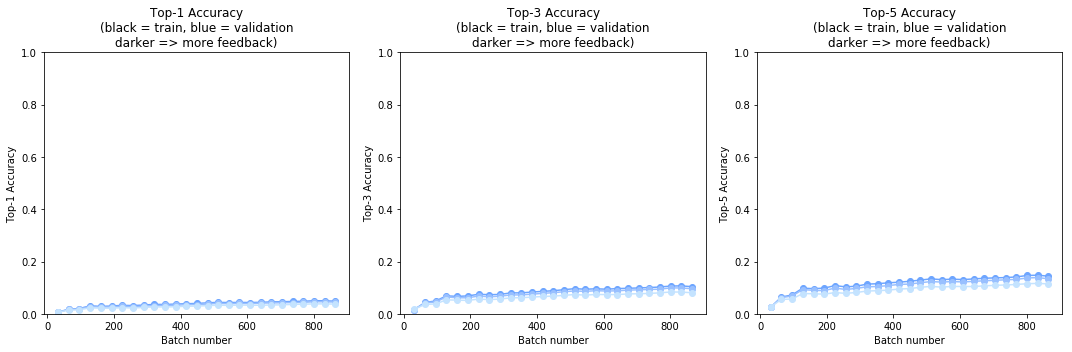

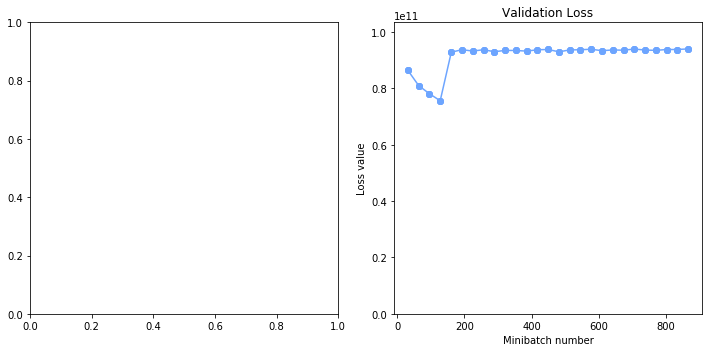

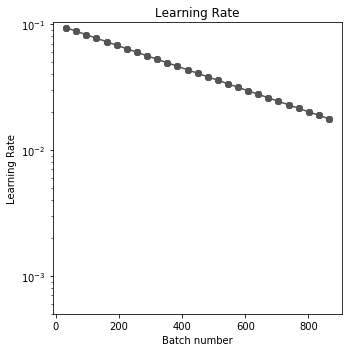

In [690]:
# Name: feedback network trained on imagenet
header, data = get_data(os.path.join(EXPERIMENT_DIR, 'imagenet/vfeedbacknet_fb_base2', 'training_log.csv'))
plot_accuracy(data, num_feedback=3, ylim=1)
plot_loss(data)
plot_learning_rate(data)

bn, epoch, step, lr, fb, tr1, tr3, tr5, trL, te1, te3, te5, teL
2278, 1, 10264.0, 0.0069257779978215694, 0, , , , , 0.14237467447916666, 0.25848388671875, 0.3282063802083333, 12797470464.0, /mnt/data/jemmons/vfeedbacknet-results/imagenet/vfeedbacknet_fb_base1/tf_checkpoint-epoch1-batch-minibatch4103, /mnt/data/jemmons/vfeedbacknet-results/imagenet/vfeedbacknet_fb_base1/model_weights-epoch1-step4103.npz
2278, 1, 10264.0, 0.0069257779978215694, 1, , , , , 0.17563883463541666, 0.3086954752604167, 0.38330078125, 12797470464.0, /mnt/data/jemmons/vfeedbacknet-results/imagenet/vfeedbacknet_fb_base1/tf_checkpoint-epoch1-batch-minibatch4103, /mnt/data/jemmons/vfeedbacknet-results/imagenet/vfeedbacknet_fb_base1/model_weights-epoch1-step4103.npz
2278, 1, 10264.0, 0.0069257779978215694, 2, , , , , 0.18428548177083334, 0.3215128580729167, 0.3978678385416667, 12797470464.0, /mnt/data/jemmons/vfeedbacknet-results/imagenet/vfeedbacknet_fb_base1/tf_checkpoint-epoch1-batch-minibatch4103, /mnt/data/jemmo

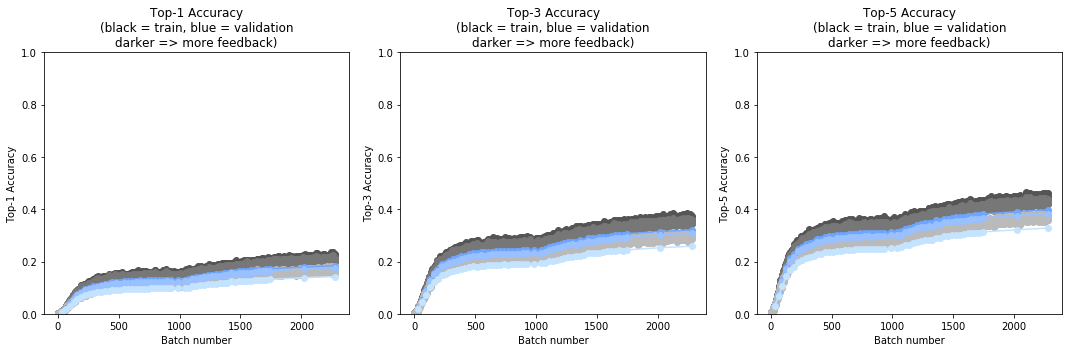

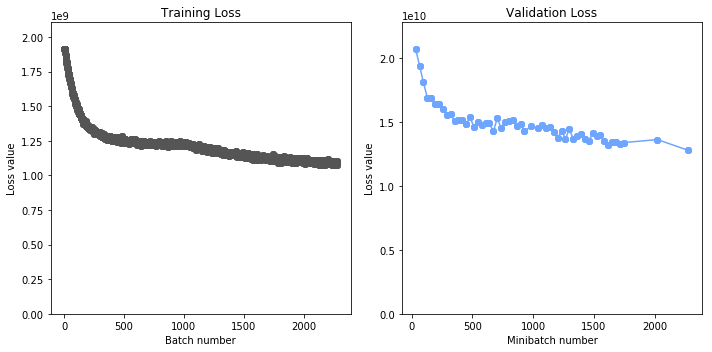

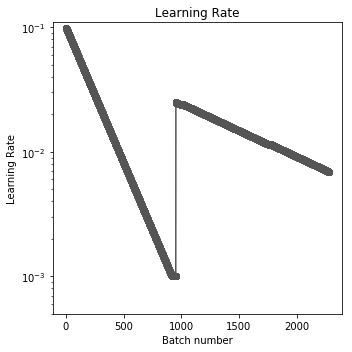

In [689]:
# Name: feedback network trained on imagenet
header, data = get_data(os.path.join(EXPERIMENT_DIR, 'imagenet/vfeedbacknet_fb_base1', 'training_log.csv'))
plot_accuracy(data, num_feedback=3, ylim=1)
plot_loss(data)
plot_learning_rate(data)

bn, epoch, step, lr, fb, tr1, tr3, tr5, trL, te1, te3, te5, teL
1682, 0, 12327.0, 0.01284196600317955, 0, 0.127685546875, 0.23291015625, 0.296875, 1222122064.0, , , , , ,
1682, 0, 12327.0, 0.01284196600317955, 1, 0.16357421875, 0.276611328125, 0.341064453125, 1222122064.0, , , , , ,
1682, 0, 12327.0, 0.01284196600317955, 2, 0.172119140625, 0.29345703125, 0.3603515625, 1222122064.0, , , , , ,
1683, 0, 12335.0, 0.012829124927520752, 0, 0.135986328125, 0.246337890625, 0.308349609375, 1172781856.0, , , , , ,
1683, 0, 12335.0, 0.012829124927520752, 1, 0.17529296875, 0.309326171875, 0.3828125, 1172781856.0, , , , , ,
1683, 0, 12335.0, 0.012829124927520752, 2, 0.1884765625, 0.328369140625, 0.398193359375, 1172781856.0, , , , , ,
1684, 0, 12343.0, 0.012816295027732849, 0, 0.132568359375, 0.250732421875, 0.31787109375, 1144314416.0, , , , , ,
1684, 0, 12343.0, 0.012816295027732849, 1, 0.1806640625, 0.319580078125, 0.387451171875, 1144314416.0, , , , , ,
1684, 0, 12343.0, 0.012816295027732849, 2

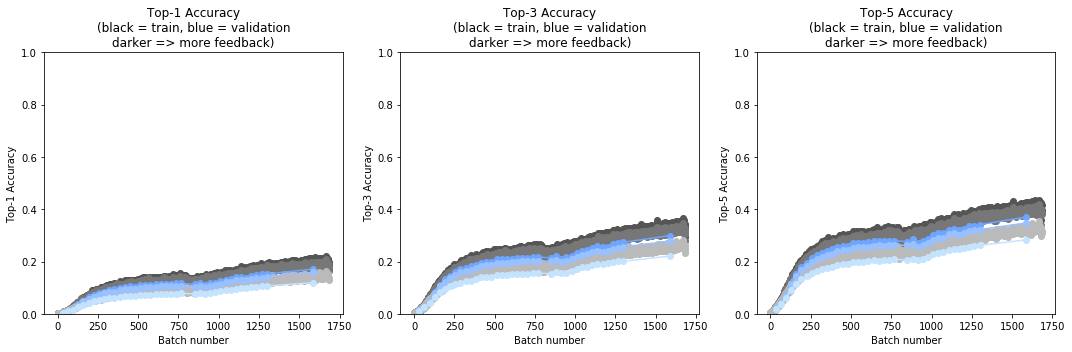

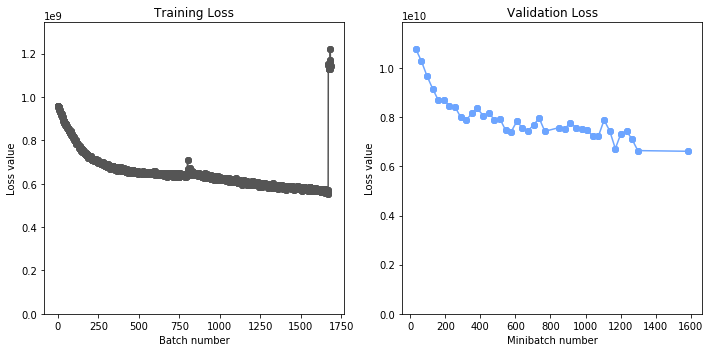

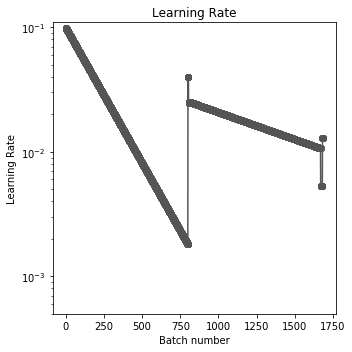

In [688]:
# Name: feedback network trained on imagenet
header, data = get_data(os.path.join(EXPERIMENT_DIR, 'imagenet/vfeedbacknet_fb_base', 'training_log.csv'))
plot_accuracy(data, num_feedback=3, ylim=1)
plot_loss(data)
plot_learning_rate(data)

In [ ]:
# Name: videoLSTM with 2 convLSTM blocks (fine tuned on ucf-101)
header, data = get_data(os.path.join(EXPERIMENT_DIR, 'ucf-101/vfeedbacknet_model1.ucf.1', 'training_log.csv'))
plot_accuracy(data, num_feedback=1, ylim=1)
plot_loss(data)
plot_learning_rate(data)

In [ ]:
# Name: videoLSTM with 2 convLSTM blocks (fine tuned on ucf-101)
header, data = get_data(os.path.join(EXPERIMENT_DIR, 'ucf-101/vfeedbacknet_model1.ucf', 'training_log.csv'))
plot_accuracy(data, num_feedback=1, ylim=1)
plot_loss(data)
plot_learning_rate(data)

bn, epoch, step, lr, fb, tr1, tr3, tr5, trL, te1, te3, te5, teL
71, 7, 12312, 0.04850202426314354, 0, 0.9912280701754386, 0.9990253411306043, 1.0, 7229.333291053772, , , , , ,
72, 8, 12483, 0.04801700636744499, 0, 0.9970760233918129, 1.0, 1.0, 4787.375425338745, , , , , ,
72, 8, 12483, 0.04801417887210846, 0, , , , , 0.7105263157894737, 0.8508771929824561, 0.8983105912930475, 9521.070333480835, /mnt/data/jemmons/vfeedbacknet-results/ucf-101/vfeedbacknet_videoLSTM_2.1/tf_checkpoint-epoch8-batch-minibatch12482, /mnt/data/jemmons/vfeedbacknet-results/ucf-101/vfeedbacknet_videoLSTM_2.1/model_weights-epoch8-step12482.npz
73, 8, 12654, 0.047536831349134445, 0, 0.9951267056530214, 1.0, 1.0, 5626.621142864227, , , , , ,
74, 8, 12825, 0.04706146940588951, 0, 0.9941520467836257, 1.0, 1.0, 4979.425623416901, , , , , ,
75, 8, 12996, 0.04659084975719452, 0, 0.9951267056530214, 1.0, 1.0, 4661.387930631638, , , , , ,
76, 8, 13167, 0.04612494632601738, 0, 0.9980506822612085, 1.0, 1.0, 5742.76385688781

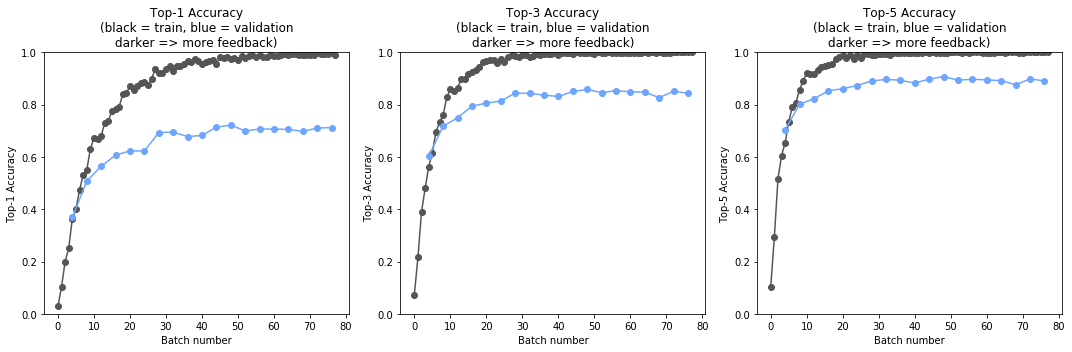

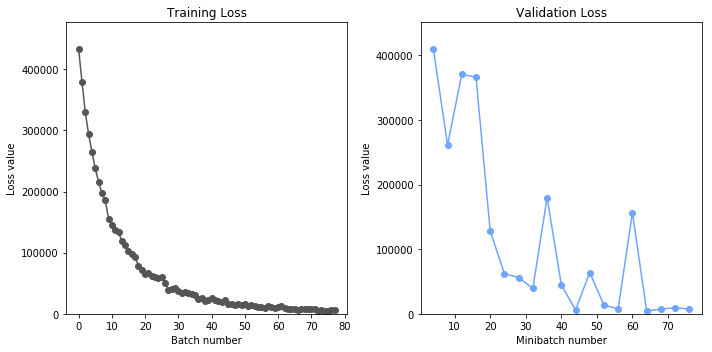

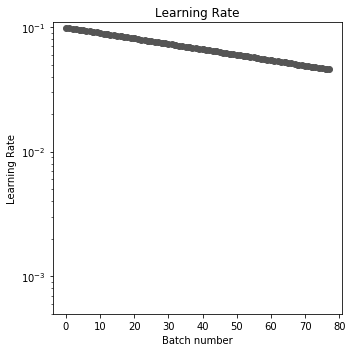

In [542]:
# Name: videoLSTM with 2 convLSTM blocks
header, data = get_data(os.path.join(EXPERIMENT_DIR, 'ucf-101/vfeedbacknet_videoLSTM_2.1', 'training_log.csv'))
plot_accuracy(data, num_feedback=1, ylim=1)
plot_loss(data)
plot_learning_rate(data)

bn, epoch, step, lr, fb, tr1, tr3, tr5, trL, te1, te3, te5, teL
119, 13, 20520, 0.05480026826262474, 0, 0.9990253411306043, 1.0, 1.0, 1431.8823747038841, , , , , ,
120, 13, 20691, 0.05452626943588257, 0, 0.9990253411306043, 1.0, 1.0, 1446.6735570430756, , , , , ,
121, 13, 20862, 0.05425363779067993, 0, 0.9970760233918129, 1.0, 1.0, 2018.4664300084114, , , , , ,
122, 13, 21033, 0.053982365876436234, 0, 0.9961013645224172, 1.0, 1.0, 2176.6394904255867, , , , , ,
123, 13, 21204, 0.053712453693151474, 0, 0.9980506822612085, 1.0, 1.0, 1794.4109300076962, , , , , ,
124, 13, 21375, 0.05344389006495476, 0, 1.0, 1.0, 1.0, 1001.3557823896408, , , , , ,
125, 13, 21546, 0.05317667871713638, 0, 0.9941520467836257, 1.0, 1.0, 3735.6694180369377, , , , , ,
126, 14, 21717, 0.05291079357266426, 0, 0.9990253411306043, 1.0, 1.0, 1497.4686868190765, , , , , ,
127, 14, 21888, 0.05264623835682869, 0, 0.9941520467836257, 0.9990253411306043, 0.9990253411306043, 2833.24155908823, , , , , ,
batch_num: 127
test a

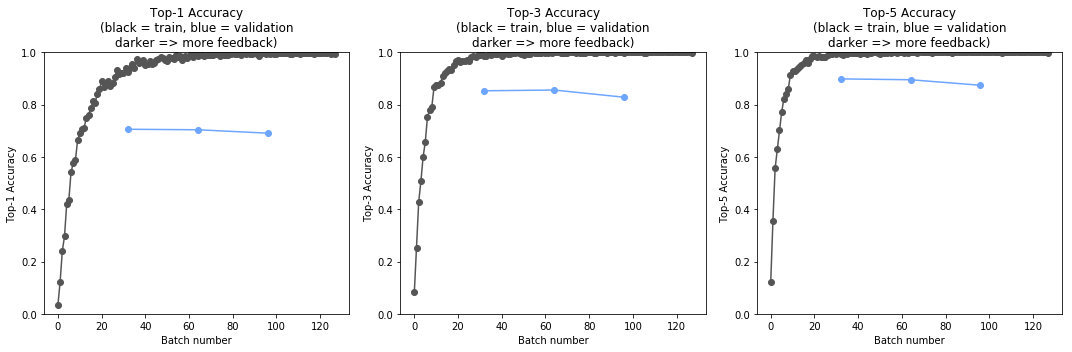

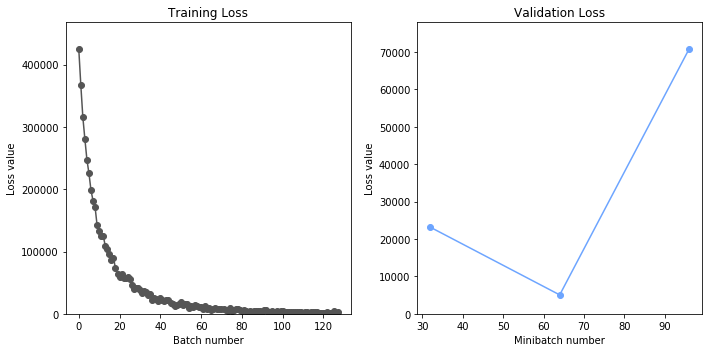

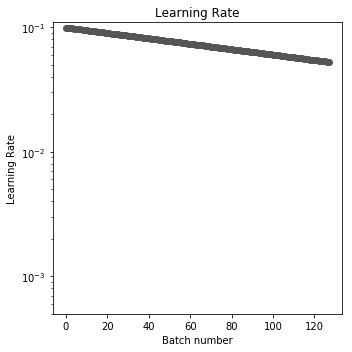

In [528]:
# Name: videoLSTM with 2 convLSTM blocks
header, data = get_data(os.path.join(EXPERIMENT_DIR, 'ucf-101/vfeedbacknet_videoLSTM_2', 'training_log.csv'))
plot_accuracy(data, num_feedback=1, ylim=1)
plot_loss(data)
plot_learning_rate(data)

bn, epoch, step, lr, fb, tr1, tr3, tr5, trL, te1, te3, te5, teL
71, 7, 12312, 0.06970673054456711, 0, 0.9736842105263158, 0.9951267056530214, 0.9980506822612085, 15382.723541259766, , , , , ,
72, 8, 12483, 0.06935819238424301, 0, 0.98635477582846, 0.9990253411306043, 0.9990253411306043, 10531.884395599365, , , , , ,
72, 8, 12483, 0.06935615837574005, 0, , , , , 0.6916829109811566, 0.8219623131903834, 0.8710201429499675, 11126.51724243164, /mnt/data/jemmons/vfeedbacknet-results/ucf-101/vfeedbacknet_videoLSTM_1.1/tf_checkpoint-epoch8-batch-minibatch12482, /mnt/data/jemmons/vfeedbacknet-results/ucf-101/vfeedbacknet_videoLSTM_1.1/model_weights-epoch8-step12482.npz
73, 8, 12654, 0.06901141256093979, 0, 0.99317738791423, 0.9990253411306043, 1.0, 8272.628068447113, , , , , ,
74, 8, 12825, 0.06866634637117386, 0, 0.9873294346978557, 0.9990253411306043, 1.0, 10134.676040649414, , , , , ,
75, 8, 12996, 0.06832301616668701, 0, 0.9883040935672515, 0.9990253411306043, 0.9990253411306043, 10291.4559

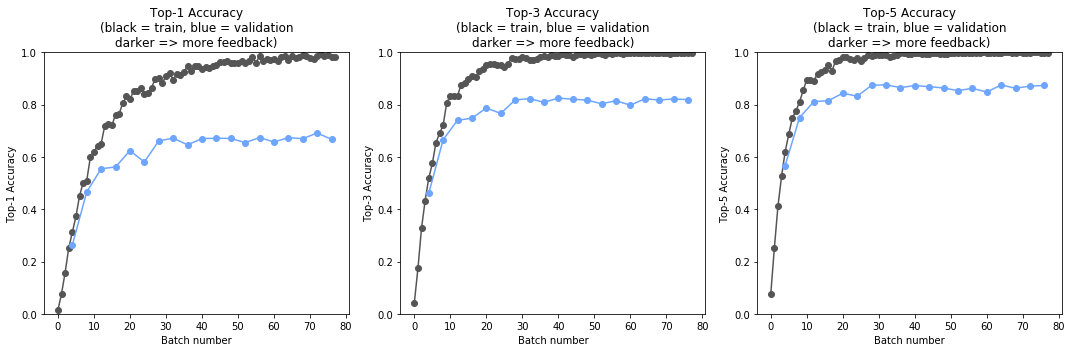

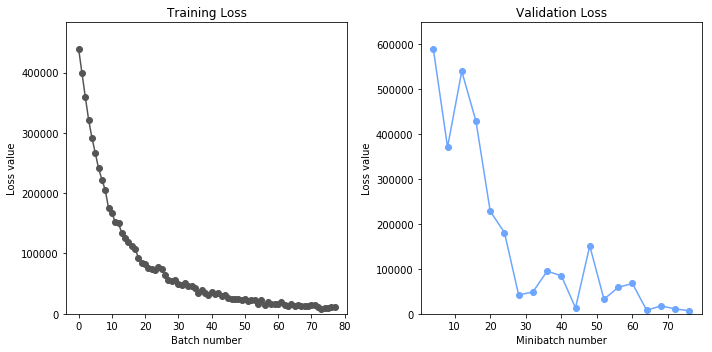

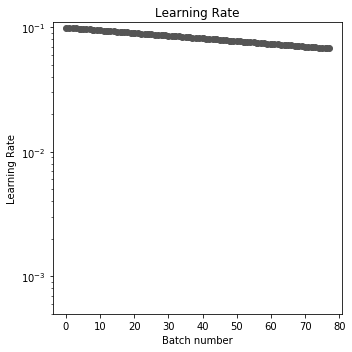

In [529]:
# Name: videoLSTM with 1 convLSTM block
header, data = get_data(os.path.join(EXPERIMENT_DIR, 'ucf-101/vfeedbacknet_videoLSTM_1.1', 'training_log.csv'))
plot_accuracy(data, num_feedback=1, ylim=1)
plot_loss(data)
plot_learning_rate(data)

bn, epoch, step, lr, fb, tr1, tr3, tr5, trL, te1, te3, te5, teL
57, 6, 9918, 0.07477416098117828, 0, 0.9707602339181286, 0.9951267056530214, 0.9970760233918129, 18815.389189720154, , , , , ,
58, 6, 10089, 0.07440028339624405, 0, 0.9639376218323586, 0.9941520467836257, 0.9980506822612085, 19278.65241241455, , , , , ,
59, 6, 10260, 0.07402829080820084, 0, 0.97953216374269, 0.9970760233918129, 0.9990253411306043, 14902.80908203125, , , , , ,
60, 6, 10431, 0.07365814596414566, 0, 0.9785575048732943, 0.9970760233918129, 0.9980506822612085, 16999.38439464569, , , , , ,
61, 6, 10602, 0.07328985631465912, 0, 0.9727095516569201, 0.9961013645224172, 0.9990253411306043, 17358.101811408997, , , , , ,
62, 6, 10773, 0.07292340695858002, 0, 0.9746588693957114, 0.9941520467836257, 0.9980506822612085, 16319.28158569336, , , , , ,
63, 7, 10944, 0.07255879044532776, 0, 0.9824561403508771, 0.9980506822612085, 0.9990253411306043, 13749.881194114685, , , , , ,
64, 7, 11115, 0.07219599932432175, 0, 0.9844054

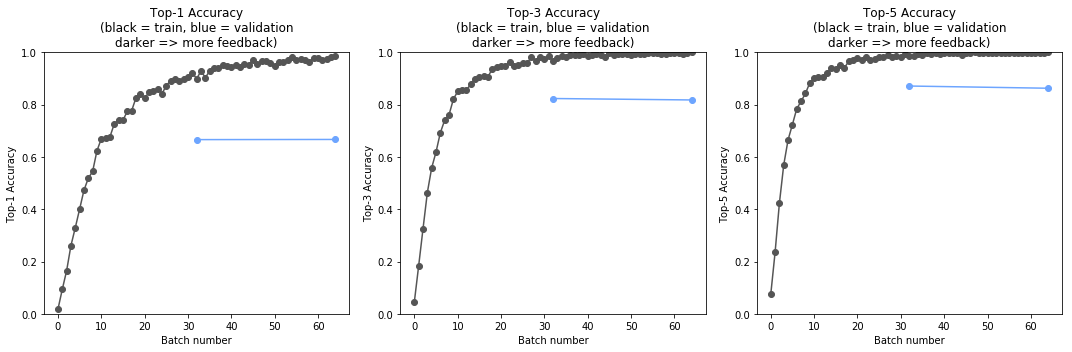

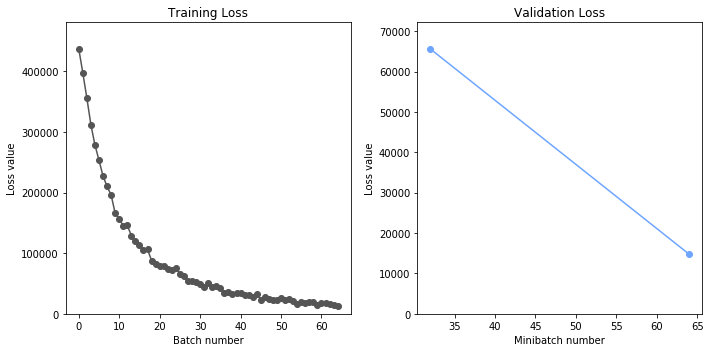

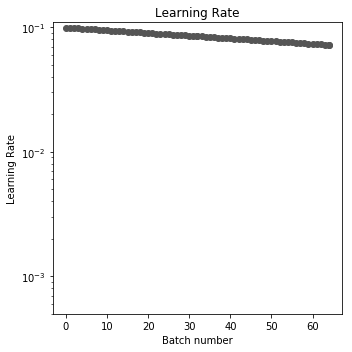

In [530]:
# Name: videoLSTM with 1 convLSTM block
header, data = get_data(os.path.join(EXPERIMENT_DIR, 'ucf-101/vfeedbacknet_videoLSTM_1', 'training_log.csv'))
plot_accuracy(data, num_feedback=1, ylim=1)
plot_loss(data)
plot_learning_rate(data)

bn, epoch, step, lr, fb, tr1, tr3, tr5, trL, te1, te3, te5, teL
74, 8, 600, 0.04711785539984703, 0, 0.68359375, 0.853515625, 0.9072265625, 2667584.75, , , , , ,
74, 8, 600, 0.04711785539984703, 1, 0.75390625, 0.8974609375, 0.9384765625, 2667584.75, , , , , ,
74, 8, 600, 0.04711785539984703, 2, 0.7685546875, 0.9111328125, 0.94921875, 2667584.75, , , , , ,
75, 8, 608, 0.04664668068289757, 0, 0.7041015625, 0.8671875, 0.9169921875, 2547739.59375, , , , , ,
75, 8, 608, 0.04664668068289757, 1, 0.7724609375, 0.8984375, 0.9384765625, 2547739.59375, , , , , ,
75, 8, 608, 0.04664668068289757, 2, 0.7861328125, 0.9072265625, 0.951171875, 2547739.59375, , , , , ,
76, 8, 616, 0.046180207282304764, 0, 0.6982421875, 0.8564453125, 0.900390625, 2629136.3125, , , , , ,
76, 8, 616, 0.046180207282304764, 1, 0.7568359375, 0.89453125, 0.9306640625, 2629136.3125, , , , , ,
76, 8, 616, 0.046180207282304764, 2, 0.7705078125, 0.908203125, 0.9423828125, 2629136.3125, , , , , ,
batch_num: 76
test accuracys (top-1)

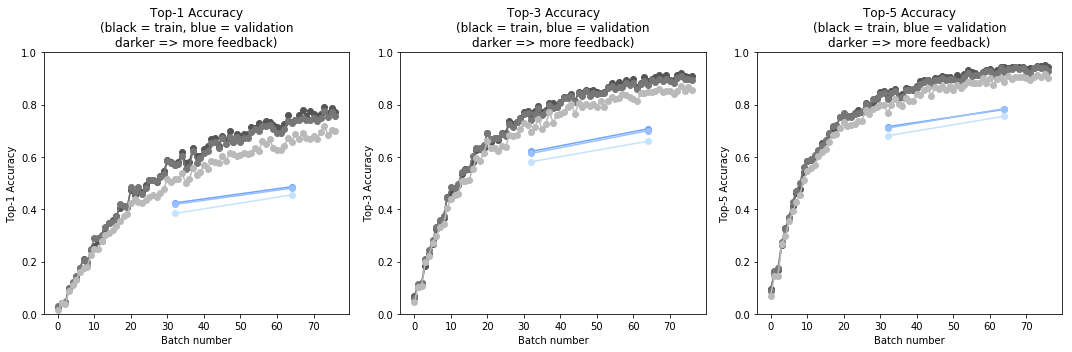

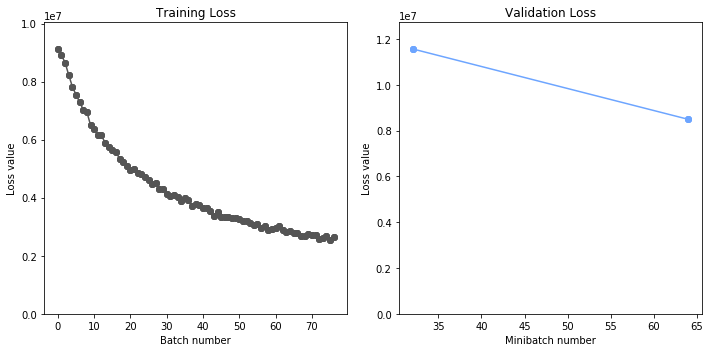

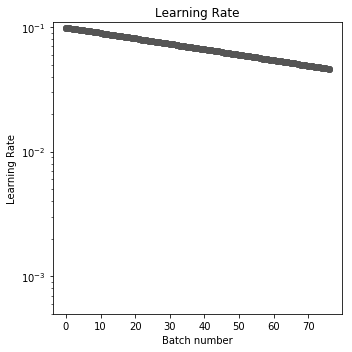

In [531]:
# Name: model16.ucf.d (dropout before the fc-layer version of model16)
header, data = get_data(os.path.join(EXPERIMENT_DIR, 'ucf-101/vfeedbacknet_model16.ucf.d', 'training_log.csv'))
plot_accuracy(data, num_feedback=3, ylim=1)
plot_loss(data)
plot_learning_rate(data)

bn, epoch, step, lr, fb, tr1, tr3, tr5, trL, te1, te3, te5, teL
28, 0, 928, 0.08648433536291122, 0, 0.083984375, 0.1826171875, 0.2509765625, 2035005.53125, , , , , ,
28, 0, 928, 0.08648433536291122, 1, 0.083984375, 0.1640625, 0.2412109375, 2035005.53125, , , , , ,
28, 0, 928, 0.08648433536291122, 2, 0.083984375, 0.162109375, 0.23046875, 2035005.53125, , , , , ,
29, 0, 960, 0.08605191111564636, 0, 0.0771484375, 0.1455078125, 0.201171875, 2046073.5234375, , , , , ,
29, 0, 960, 0.08605191111564636, 1, 0.0771484375, 0.14453125, 0.2236328125, 2046073.5234375, , , , , ,
29, 0, 960, 0.08605191111564636, 2, 0.0771484375, 0.140625, 0.2373046875, 2046073.5234375, , , , , ,
30, 0, 992, 0.08562164753675461, 0, 0.07421875, 0.1318359375, 0.205078125, 2038226.734375, , , , , ,
30, 0, 992, 0.08562164753675461, 1, 0.07421875, 0.146484375, 0.22265625, 2038226.734375, , , , , ,
30, 0, 992, 0.08562164753675461, 2, 0.07421875, 0.1455078125, 0.22265625, 2038226.734375, , , , , ,
batch_num: 30


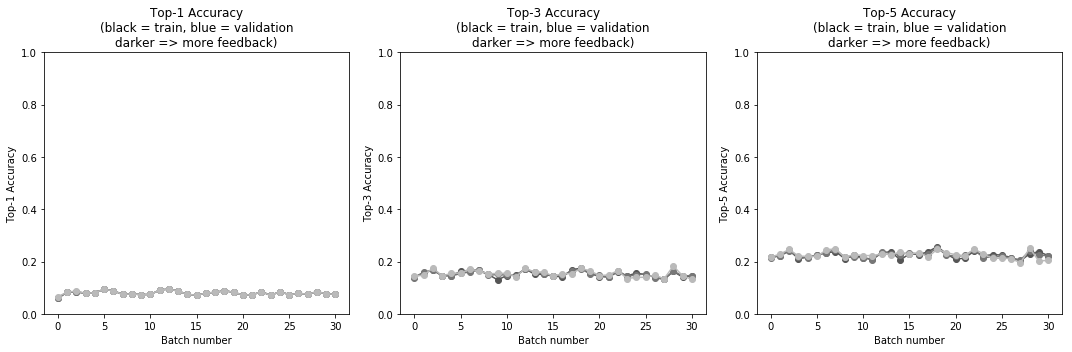

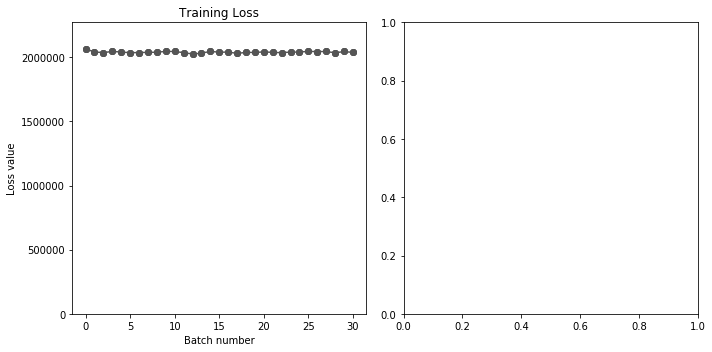

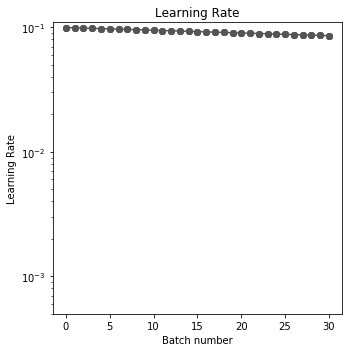

In [532]:
# Name: model21.ucf
_, data = get_data(os.path.join(EXPERIMENT_DIR, '20bn/vfeedbacknet_model21.gce', 'training_log.csv'))
plot_accuracy(data, num_feedback=3, ylim=1)
plot_loss(data)
plot_learning_rate(data)

bn, epoch, step, lr, fb, tr1, tr3, tr5, trL, te1, te3, te5, teL
120, 6, 4760, 0.015124039724469185, 0, 0.2361111111111111, 0.40370370370370373, 0.5092592592592593, 1754910.65625, , , , , ,
120, 6, 4760, 0.015124039724469185, 1, 0.2574074074074074, 0.4462962962962963, 0.5453703703703704, 1754910.65625, , , , , ,
120, 6, 4760, 0.015124039724469185, 2, 0.26666666666666666, 0.4527777777777778, 0.5574074074074075, 1754910.65625, , , , , ,
121, 6, 4800, 0.014972797594964504, 0, 0.25, 0.41759259259259257, 0.5148148148148148, 1755825.921875, , , , , ,
121, 6, 4800, 0.014972797594964504, 1, 0.26944444444444443, 0.4666666666666667, 0.5601851851851852, 1755825.921875, , , , , ,
121, 6, 4800, 0.014972797594964504, 2, 0.26944444444444443, 0.4666666666666667, 0.5777777777777777, 1755825.921875, , , , , ,
122, 6, 4840, 0.014823071658611298, 0, 0.24814814814814815, 0.4074074074074074, 0.5101851851851852, 1752055.1015625, , , , , ,
122, 6, 4840, 0.014823071658611298, 1, 0.26851851851851855, 0.453703703

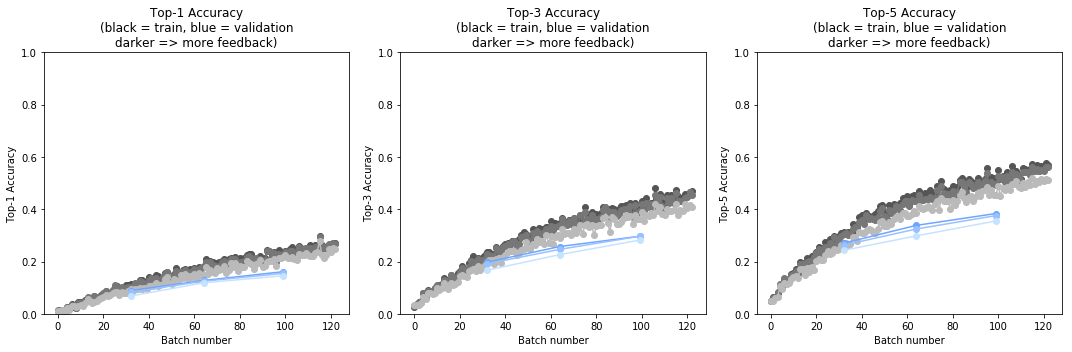

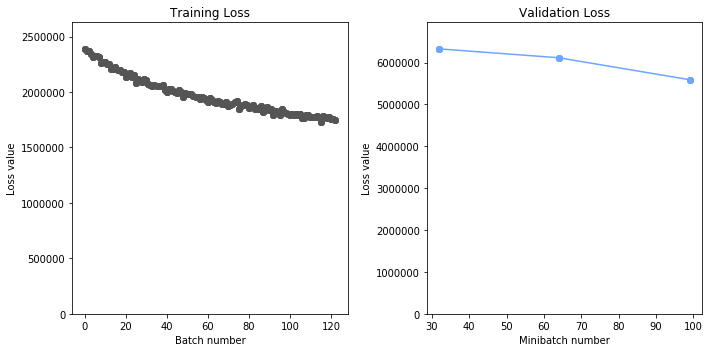

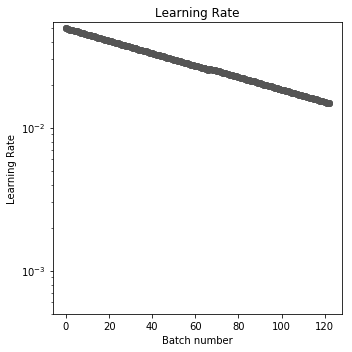

In [533]:
# Name: model20.ucf
_, data = get_data(os.path.join(EXPERIMENT_DIR, 'ucf-101/vfeedbacknet_model20.ucf', 'training_log.csv'))
plot_accuracy(data, num_feedback=3, ylim=1)
plot_loss(data)
plot_learning_rate(data)

bn, epoch, step, lr, fb, tr1, tr3, tr5, trL, te1, te3, te5, teL
29, 3, 2640, 0.07397850602865219, 0, 0.10984848484848485, 0.23295454545454544, 0.32575757575757575, 891294.8017578125, , , , , ,
29, 3, 2640, 0.07397850602865219, 1, 0.11931818181818182, 0.24621212121212122, 0.3446969696969697, 891294.8017578125, , , , , ,
29, 3, 2640, 0.07397850602865219, 2, 0.11837121212121213, 0.2547348484848485, 0.3428030303030303, 891294.8017578125, , , , , ,
30, 3, 2728, 0.07323872298002243, 0, 0.12878787878787878, 0.24242424242424243, 0.3248106060606061, 882684.2548828125, , , , , ,
30, 3, 2728, 0.07323872298002243, 1, 0.13257575757575757, 0.2566287878787879, 0.3418560606060606, 882684.2548828125, , , , , ,
30, 3, 2728, 0.07323872298002243, 2, 0.13636363636363635, 0.27178030303030304, 0.3465909090909091, 882684.2548828125, , , , , ,
31, 3, 2816, 0.07250633835792542, 0, 0.11742424242424243, 0.2481060606060606, 0.3352272727272727, 878761.15625, , , , , ,
31, 3, 2816, 0.07250633835792542, 1, 0.12310606

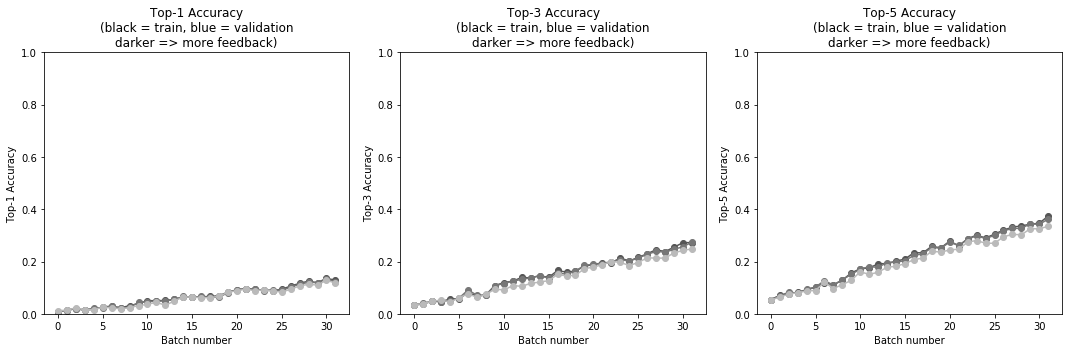

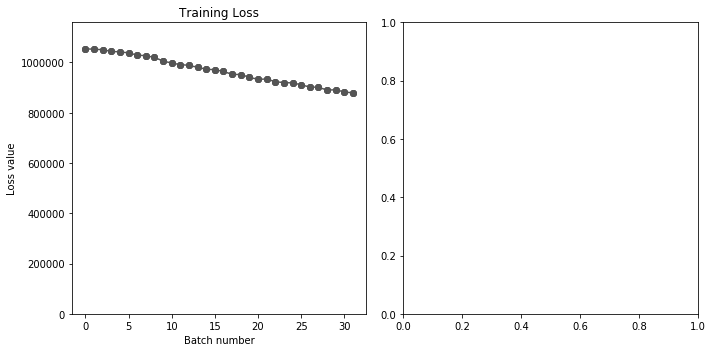

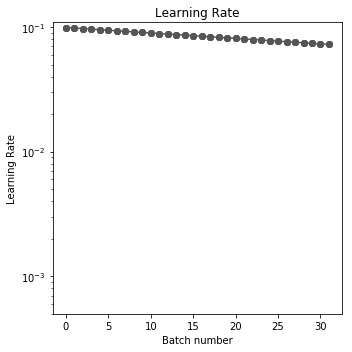

In [97]:
# Name: model20.f
_, data = get_data(os.path.join(EXPERIMENT_DIR, 'ucf-101/vfeedbacknet_model20.f', 'training_log.csv'))
plot_accuracy(data, num_feedback=3, ylim=1)
plot_loss(data)
plot_learning_rate(data)

bn, epoch, step, lr, fb, tr1, tr3, tr5, trL, te1, te3, te5, teL
457, 36, 13072, 0.012906170450150967, 0, 0.8798828125, 0.962890625, 0.9765625, 455047.7734375, , , , , ,
457, 36, 13072, 0.012906170450150967, 1, 0.9072265625, 0.97265625, 0.984375, 455047.7734375, , , , , ,
457, 36, 13072, 0.012906170450150967, 2, 0.91796875, 0.9755859375, 0.9873046875, 455047.7734375, , , , , ,
458, 36, 13104, 0.01284163910895586, 0, 0.8828125, 0.9609375, 0.978515625, 439158.0693359375, , , , , ,
458, 36, 13104, 0.01284163910895586, 1, 0.91796875, 0.97265625, 0.984375, 439158.0693359375, , , , , ,
458, 36, 13104, 0.01284163910895586, 2, 0.919921875, 0.9736328125, 0.9853515625, 439158.0693359375, , , , , ,
459, 36, 13136, 0.01277743186801672, 0, 0.9033203125, 0.9716796875, 0.984375, 425896.7880859375, , , , , ,
459, 36, 13136, 0.01277743186801672, 1, 0.9306640625, 0.982421875, 0.990234375, 425896.7880859375, , , , , ,
459, 36, 13136, 0.01277743186801672, 2, 0.9306640625, 0.9814453125, 0.9892578125, 425896

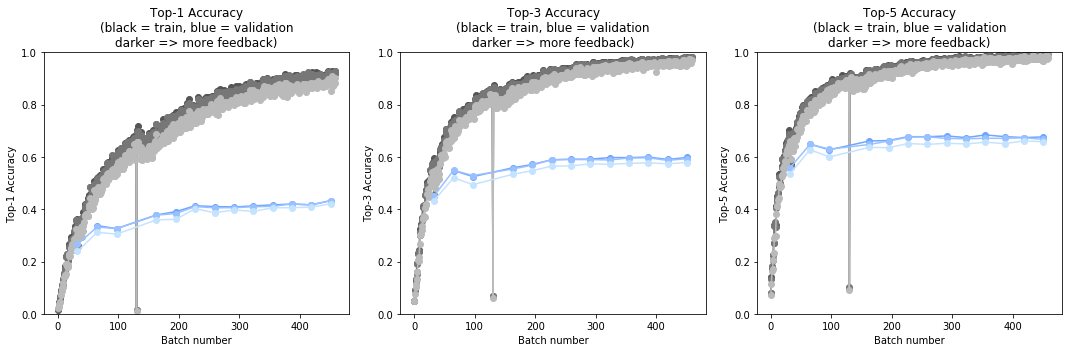

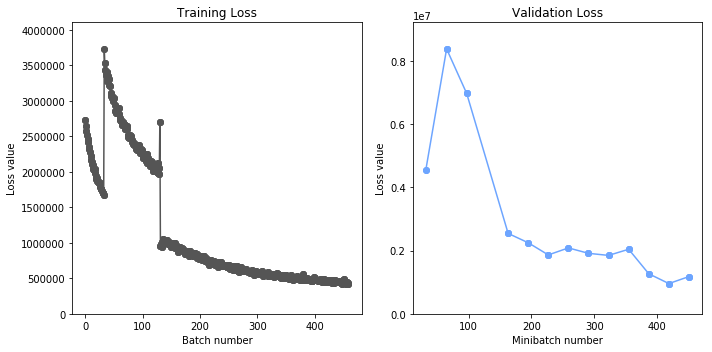

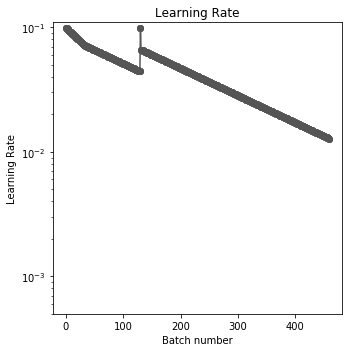

In [181]:
# Name: model19.f
_, data = get_data(os.path.join(EXPERIMENT_DIR, 'ucf-101/vfeedbacknet_model19.f', 'training_log.csv'))
plot_accuracy(data, num_feedback=3, ylim=1)
plot_loss(data)
plot_learning_rate(data)

bn, epoch, step, lr, fb, tr1, tr3, tr5, trL, te1, te3, te5, teL
665, 1, 10256, 0.007662005722522736, 0, 0.728515625, 0.923828125, 0.95703125, 1850625.0546875, , , , , ,
665, 1, 10256, 0.007662005722522736, 1, 0.7578125, 0.927734375, 0.95703125, 1850625.0546875, , , , , ,
665, 1, 10256, 0.007662005722522736, 2, 0.7587890625, 0.9287109375, 0.955078125, 1850625.0546875, , , , , ,
666, 1, 10272, 0.007631357293576002, 0, 0.740234375, 0.9267578125, 0.9521484375, 1817613.703125, , , , , ,
666, 1, 10272, 0.007631357293576002, 1, 0.7626953125, 0.935546875, 0.962890625, 1817613.703125, , , , , ,
666, 1, 10272, 0.007631357293576002, 2, 0.7822265625, 0.935546875, 0.962890625, 1817613.703125, , , , , ,
666, 1, 10272, 0.0076294466853141785, 0, , , , , 0.7325613839285714, 0.9231305803571429, 0.9560546875, 22673682.5, /mnt/data/jemmons/vfeedbacknet-results/20bn/vfeedbacknet_model20.gce/tf_checkpoint-epoch1-batch-minibatch2063, /mnt/data/jemmons/vfeedbacknet-results/20bn/vfeedbacknet_model20.gce/model_

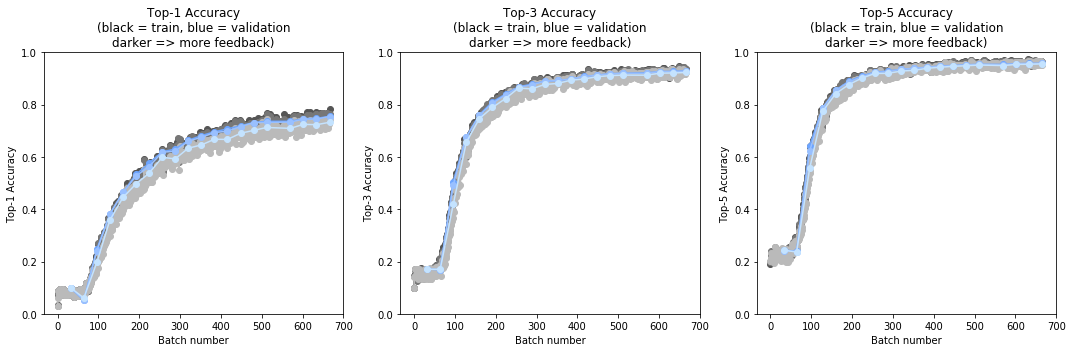

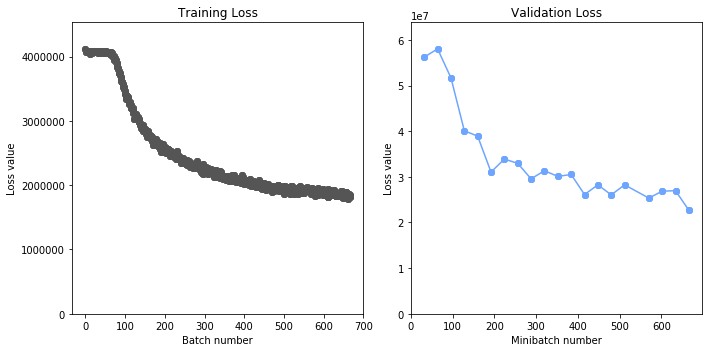

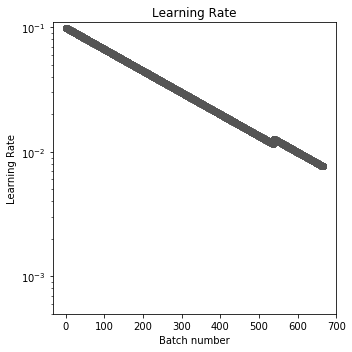

In [161]:
# Name: model20
_, data = get_data(os.path.join(EXPERIMENT_DIR, '20bn/vfeedbacknet_model20.gce', 'training_log.csv'))
plot_accuracy(data, num_feedback=3, ylim=1)
plot_loss(data)
plot_learning_rate(data)

bn, epoch, step, lr, fb, tr1, tr3, tr5, trL, te1, te3, te5, teL
743, 1, 8184, 0.00507111381739378, 0, 0.8428030303030303, 0.9659090909090909, 0.9848484848484849, 2047883.15625, , , , , ,
743, 1, 8184, 0.00507111381739378, 1, 0.8825757575757576, 0.9772727272727273, 0.9886363636363636, 2047883.15625, , , , , ,
743, 1, 8184, 0.00507111381739378, 2, 0.8910984848484849, 0.9791666666666666, 0.990530303030303, 2047883.15625, , , , , ,
744, 1, 8195, 0.005050829146057367, 0, 0.8465909090909091, 0.9602272727272727, 0.9791666666666666, 2075243.640625, , , , , ,
744, 1, 8195, 0.005050829146057367, 1, 0.875, 0.9715909090909091, 0.9857954545454546, 2075243.640625, , , , , ,
744, 1, 8195, 0.005050829146057367, 2, 0.8740530303030303, 0.9744318181818182, 0.9886363636363636, 2075243.640625, , , , , ,
745, 1, 8206, 0.005030625965446234, 0, 0.8191287878787878, 0.9573863636363636, 0.9810606060606061, 2138875.984375, , , , , ,
745, 1, 8206, 0.005030625965446234, 1, 0.8645833333333334, 0.9668560606060606, 0.

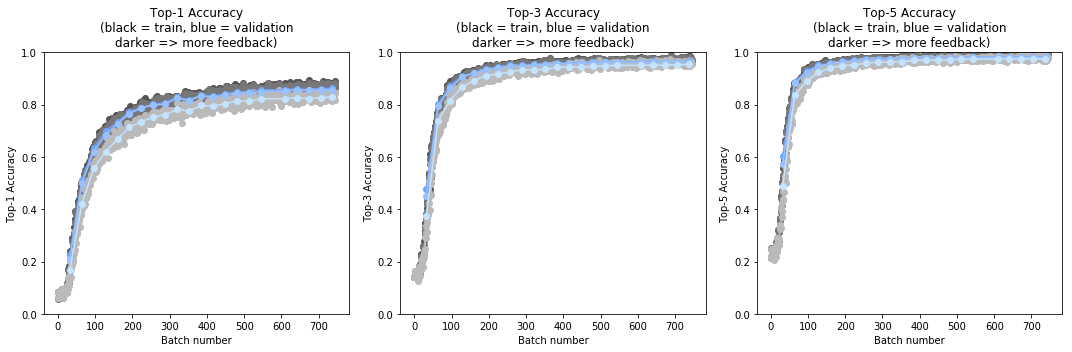

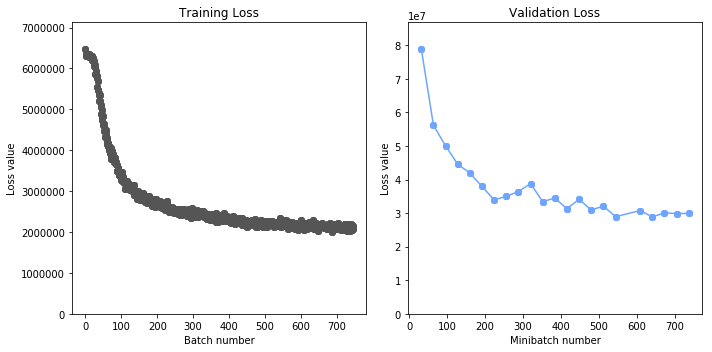

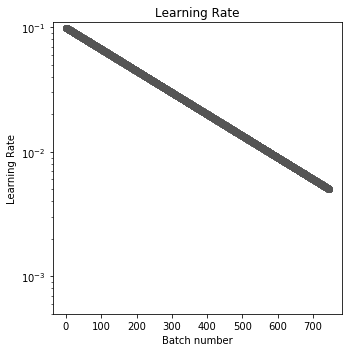

In [177]:
# Name: model19
header, data = get_data(os.path.join(EXPERIMENT_DIR, '20bn/vfeedbacknet_model19.gce', 'training_log.csv'))
plot_accuracy(data, num_feedback=3, ylim=1)
plot_loss(data)
plot_learning_rate(data)

bn, epoch, step, lr, fb, tr1, tr3, tr5, trL, te1, te3, te5, teL
147, 1, 1628, 0.055276405066251755, 0, 0.07670454545454546, 0.1846590909090909, 0.2803030303030303, 6225324.0, , , , , ,
147, 1, 1628, 0.055276405066251755, 1, 0.08049242424242424, 0.19981060606060605, 0.29924242424242425, 6225324.0, , , , , ,
147, 1, 1628, 0.055276405066251755, 2, 0.10132575757575757, 0.20738636363636365, 0.29071969696969696, 6225324.0, , , , , ,
148, 1, 1639, 0.05505530163645744, 0, 0.07575757575757576, 0.19981060606060605, 0.2935606060606061, 6208717.5625, , , , , ,
148, 1, 1639, 0.05505530163645744, 1, 0.08996212121212122, 0.21401515151515152, 0.3058712121212121, 6208717.5625, , , , , ,
148, 1, 1639, 0.05505530163645744, 2, 0.09848484848484848, 0.21401515151515152, 0.3068181818181818, 6208717.5625, , , , , ,
149, 1, 1650, 0.05483507737517357, 0, 0.06818181818181818, 0.19602272727272727, 0.29924242424242425, 6209153.125, , , , , ,
149, 1, 1650, 0.05483507737517357, 1, 0.08143939393939394, 0.210227272727

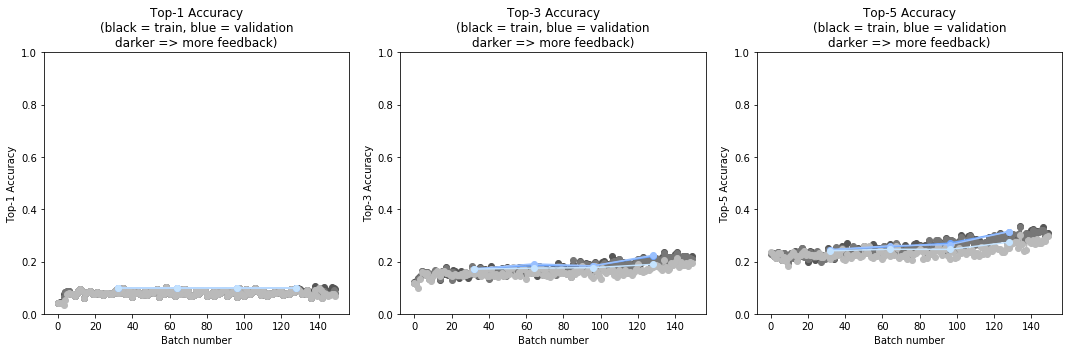

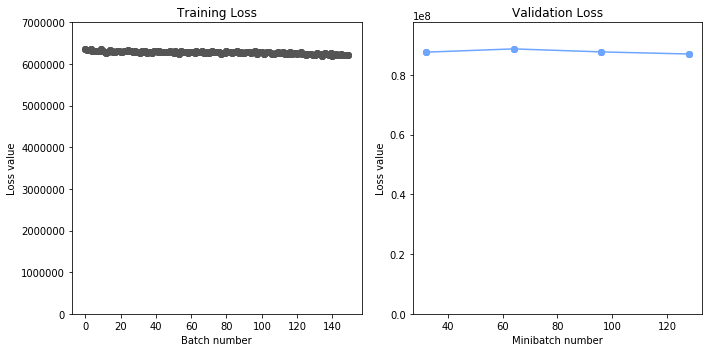

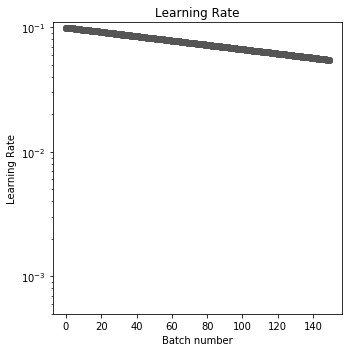

In [45]:
# Name: model18
header, data = get_data(os.path.join(EXPERIMENT_DIR, '20bn/vfeedbacknet_model18.gce', 'training_log.csv'))
plot_accuracy(data, num_feedback=3, ylim=1)
plot_loss(data)
plot_learning_rate(data)

bn, epoch, step, lr, fb, tr1, tr3, tr5, trL, te1, te3, te5, teL
556, 61, 8912, 0.004999999888241291, 0, 0.908203125, 0.9775390625, 0.98828125, 446283.43359375, , , , , ,
556, 61, 8912, 0.004999999888241291, 1, 0.9716796875, 0.9921875, 0.998046875, 446283.43359375, , , , , ,
556, 61, 8912, 0.004999999888241291, 2, 0.9736328125, 0.9951171875, 0.9990234375, 446283.43359375, , , , , ,
557, 61, 8928, 0.004999999888241291, 0, 0.875, 0.96875, 0.986328125, 487307.0625, , , , , ,
557, 61, 8928, 0.004999999888241291, 1, 0.9560546875, 0.9912109375, 0.994140625, 487307.0625, , , , , ,
557, 61, 8928, 0.004999999888241291, 2, 0.966796875, 0.990234375, 0.9970703125, 487307.0625, , , , , ,
558, 62, 8944, 0.004999999888241291, 0, 0.904296875, 0.98046875, 0.9892578125, 434670.48046875, , , , , ,
558, 62, 8944, 0.004999999888241291, 1, 0.962890625, 0.994140625, 0.9990234375, 434670.48046875, , , , , ,
558, 62, 8944, 0.004999999888241291, 2, 0.9775390625, 0.9970703125, 1.0, 434670.48046875, , , , , ,
batc

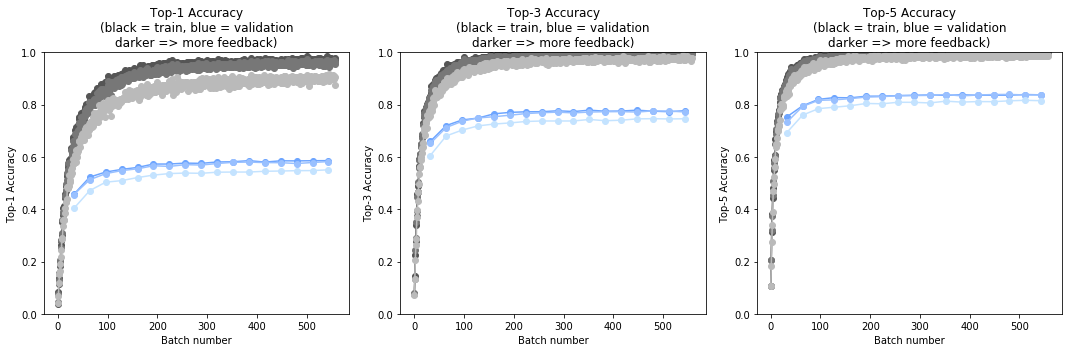

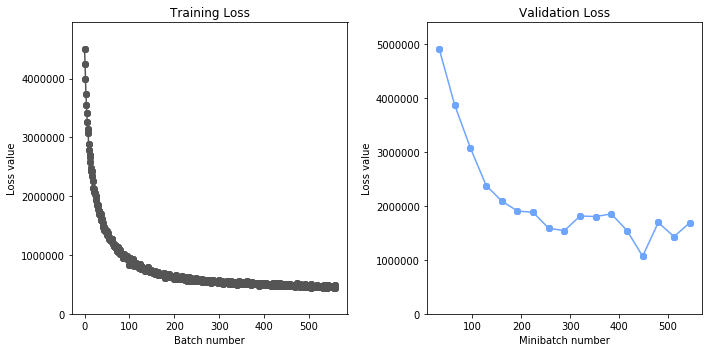

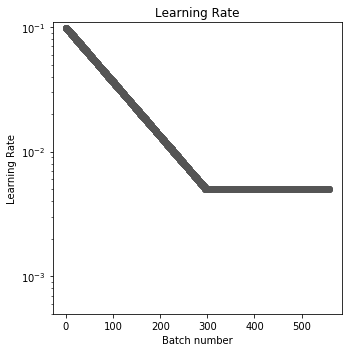

In [46]:
# Name: model16.ucf.r (regularized fc-layer version of model16)
header, data = get_data(os.path.join(EXPERIMENT_DIR, 'ucf-101/vfeedbacknet_model16.ucf.r', 'training_log.csv'))
plot_accuracy(data, num_feedback=3, ylim=1)
plot_loss(data)
plot_learning_rate(data)

bn, epoch, step, lr, fb, tr1, tr3, tr5, trL, te1, te3, te5, teL
323, 35, 10368, 0.004999999888241291, 0, 0.927734375, 0.984375, 0.9921875, 188478.65966796875, , , , , ,
323, 35, 10368, 0.004999999888241291, 1, 0.9775390625, 0.9951171875, 0.99609375, 188478.65966796875, , , , , ,
323, 35, 10368, 0.004999999888241291, 2, 0.9833984375, 0.998046875, 1.0, 188478.65966796875, , , , , ,
324, 36, 10400, 0.004999999888241291, 0, 0.91796875, 0.9833984375, 0.994140625, 188043.625, , , , , ,
324, 36, 10400, 0.004999999888241291, 1, 0.970703125, 0.9951171875, 0.998046875, 188043.625, , , , , ,
324, 36, 10400, 0.004999999888241291, 2, 0.98046875, 0.998046875, 0.9990234375, 188043.625, , , , , ,
325, 36, 10432, 0.004999999888241291, 0, 0.923828125, 0.986328125, 0.9970703125, 186764.41235351562, , , , , ,
325, 36, 10432, 0.004999999888241291, 1, 0.98046875, 0.9970703125, 0.9990234375, 186764.41235351562, , , , , ,
325, 36, 10432, 0.004999999888241291, 2, 0.9814453125, 0.9990234375, 0.9990234375, 18676

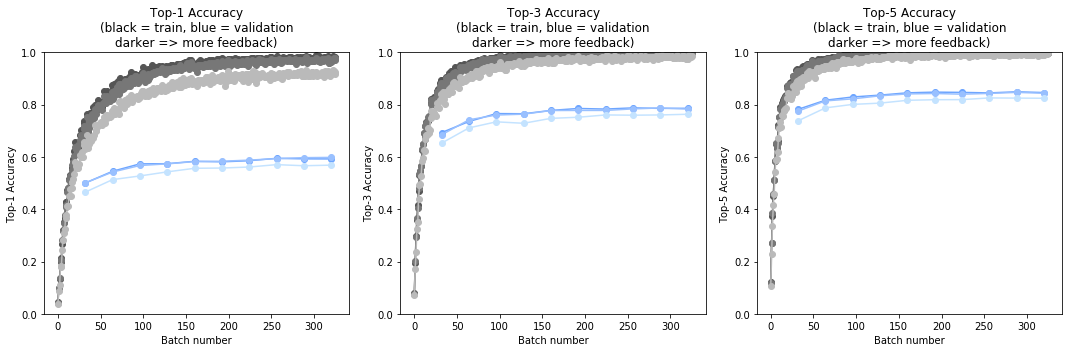

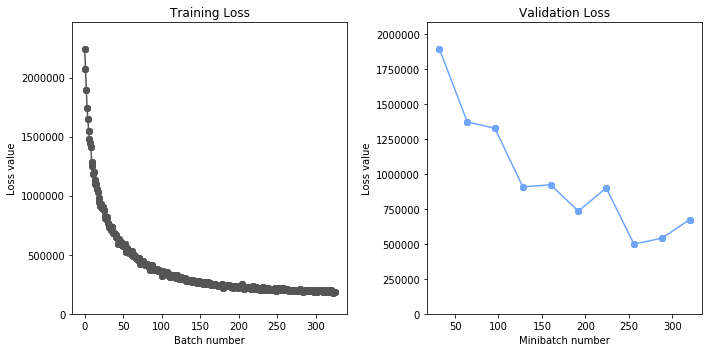

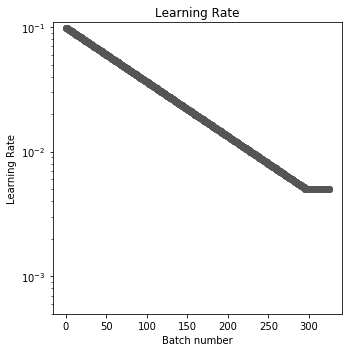

In [47]:
# Name: model16.ucf1 (different cmdline args, e.g. more frames)
header, data = get_data(os.path.join(EXPERIMENT_DIR, 'ucf-101/vfeedbacknet_model16.ucf1', 'training_log.csv'))
plot_accuracy(data, num_feedback=3, ylim=1)
plot_loss(data)
plot_learning_rate(data)

bn, epoch, step, lr, fb, tr1, tr3, tr5, trL, te1, te3, te5, teL
129, 14, 1430, 0.027100209146738052, 0, 0.8465909090909091, 0.9450757575757576, 0.9659090909090909, 1418285.34375, , , , , ,
129, 14, 1430, 0.027100209146738052, 1, 0.9053030303030303, 0.9668560606060606, 0.9810606060606061, 1418285.34375, , , , , ,
129, 14, 1430, 0.027100209146738052, 2, 0.9251893939393939, 0.9744318181818182, 0.9839015151515151, 1418285.34375, , , , , ,
130, 14, 1441, 0.026829207316040993, 0, 0.8352272727272727, 0.9460227272727273, 0.9715909090909091, 1429407.78125, , , , , ,
130, 14, 1441, 0.026829207316040993, 1, 0.9147727272727273, 0.9753787878787878, 0.9820075757575758, 1429407.78125, , , , , ,
130, 14, 1441, 0.026829207316040993, 2, 0.9375, 0.9791666666666666, 0.9867424242424242, 1429407.78125, , , , , ,
131, 14, 1452, 0.026560917496681213, 0, 0.8428030303030303, 0.9460227272727273, 0.9706439393939394, 1361862.546875, , , , , ,
131, 14, 1452, 0.026560917496681213, 1, 0.928030303030303, 0.97727272727

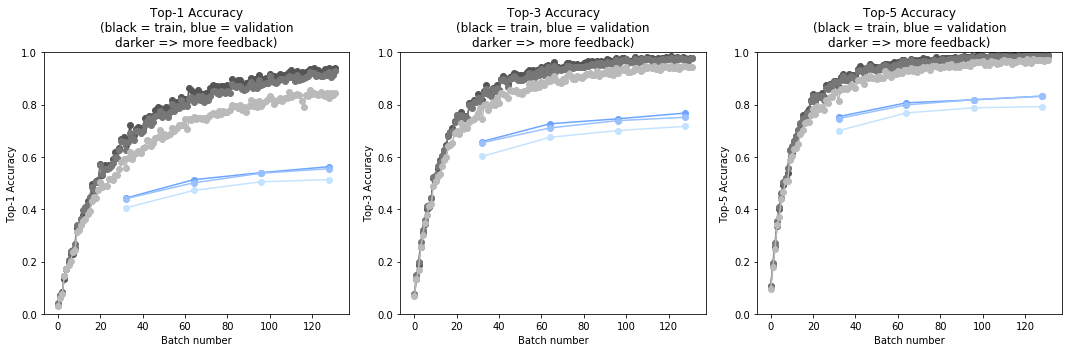

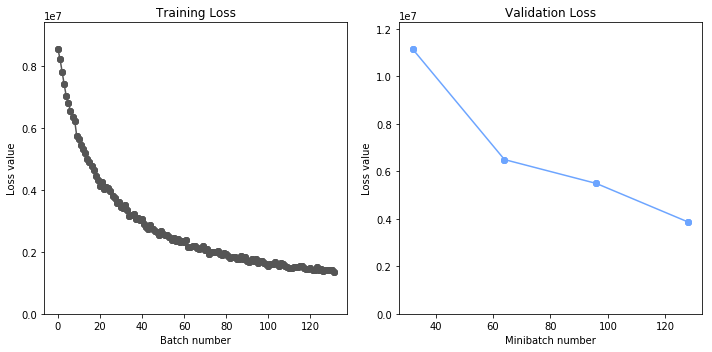

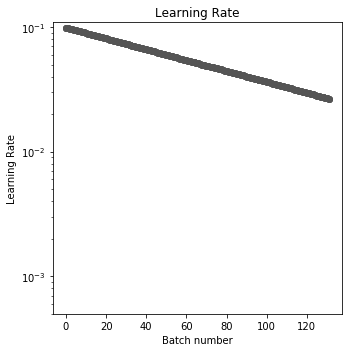

In [12]:
# Name: model16.ucf
header, data = get_data(os.path.join(EXPERIMENT_DIR, 'ucf-101/vfeedbacknet_model16.ucf', 'training_log.csv'))
plot_accuracy(data, num_feedback=3, ylim=1)
plot_loss(data)
plot_learning_rate(data)

bn, epoch, step, lr, fb, tr1, tr3, tr5, trL, te1, te3, te5, teL
35, 0.06967316567897797, 0.2831439393939394, 0.4706439393939394, 0.5587121212121212, 2535828.3359375, , , ,
batch_num: 35
test accuracys (top-1): [0.00946969696969697]


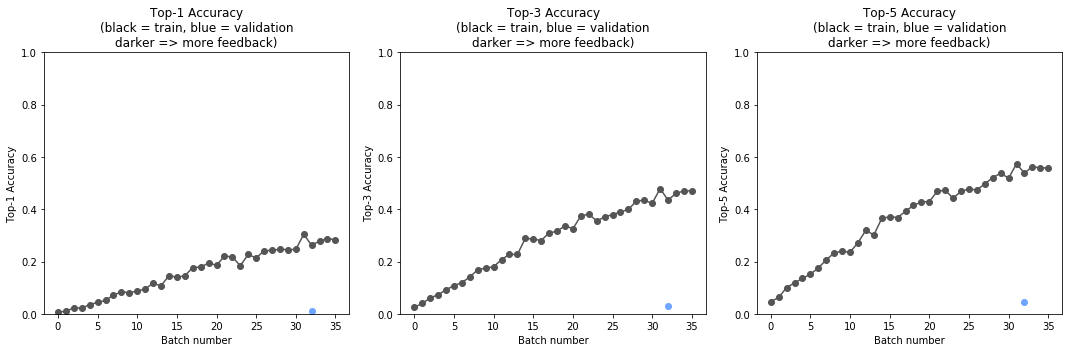

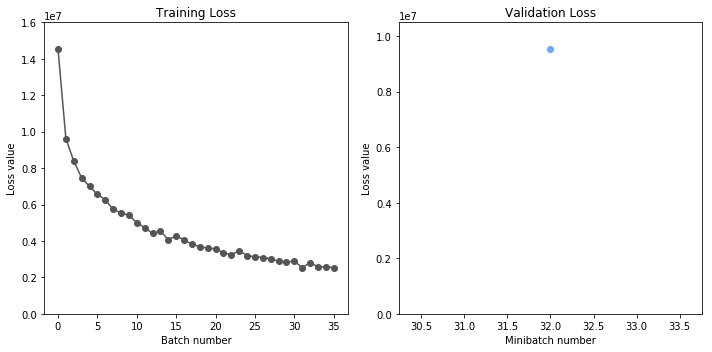

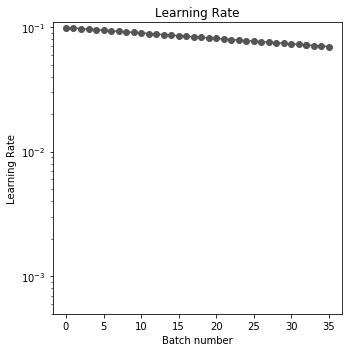

In [649]:
# Name: single frame ucf-101
header, data = get_data_legacy(os.path.join(EXPERIMENT_DIR, 'ucf-101/nofeedbacknet_vgg16-singleimage', 'training_log.csv'))
plot_accuracy(data, num_feedback=1, ylim=1)
plot_loss(data)
plot_learning_rate(data)

bn, epoch, step, lr, fb, tr1, tr3, tr5, trL, te1, te3, te5, teL
332, 2, 2664, 1.8852055291063152e-05, 0, 0.484375, 0.8193359375, 0.8916015625, 3759579.59375, , , , , ,
332, 2, 2664, 1.8852055291063152e-05, 1, 0.6259765625, 0.896484375, 0.9384765625, 3759579.59375, , , , , ,
332, 2, 2664, 1.8852055291063152e-05, 2, 0.6611328125, 0.9072265625, 0.9462890625, 3759579.59375, , , , , ,
333, 2, 2672, 1.8757793441182002e-05, 0, 0.494140625, 0.80078125, 0.88671875, 3799991.9375, , , , , ,
333, 2, 2672, 1.8757793441182002e-05, 1, 0.6484375, 0.876953125, 0.93359375, 3799991.9375, , , , , ,
333, 2, 2672, 1.8757793441182002e-05, 2, 0.6474609375, 0.890625, 0.943359375, 3799991.9375, , , , , ,
334, 2, 2680, 1.8664004528545775e-05, 0, 0.5166015625, 0.8095703125, 0.890625, 3792876.625, , , , , ,
334, 2, 2680, 1.8664004528545775e-05, 1, 0.6533203125, 0.8798828125, 0.9228515625, 3792876.625, , , , , ,
334, 2, 2680, 1.8664004528545775e-05, 2, 0.6591796875, 0.8916015625, 0.9326171875, 3792876.625, , , , , 

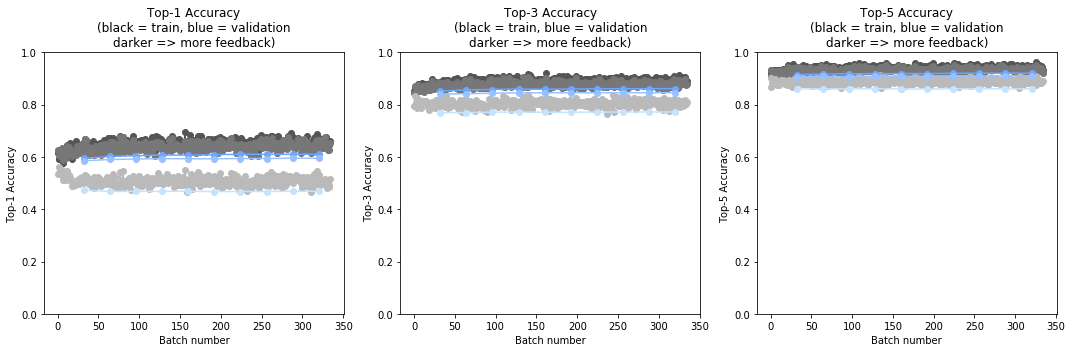

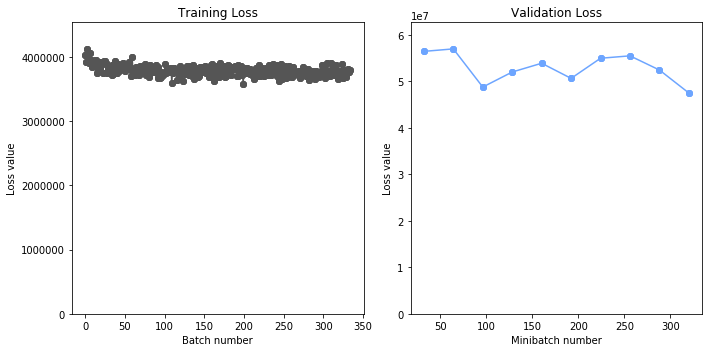

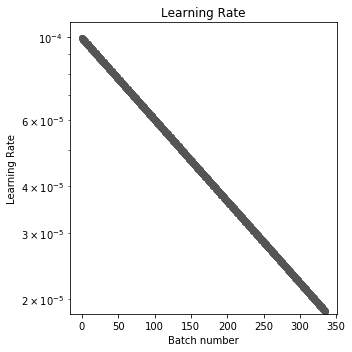

In [650]:
# Name: model16.f
header, data = get_data(os.path.join(EXPERIMENT_DIR, '20bn/vfeedbacknet_model16.f.gce', 'training_log.csv'))
plot_accuracy(data, num_feedback=3, ylim=1)
plot_loss(data)
plot_learning_rate(data)

bn, epoch, step, lr, fb, tr1, tr3, tr5, trL, te1, te3, te5, teL
408, 0, 863.0, 0.0016908966936171055, 0, 0.3828125, 0.677734375, 0.78515625, 5026023.125, , , , , ,
408, 0, 863.0, 0.0016908966936171055, 1, 0.4296875, 0.72265625, 0.8349609375, 5026023.125, , , , , ,
408, 0, 863.0, 0.0016908966936171055, 2, 0.44921875, 0.7392578125, 0.849609375, 5026023.125, , , , , ,
409, 0, 871.0, 0.0016739876009523869, 0, 0.3623046875, 0.673828125, 0.7900390625, 5050367.125, , , , , ,
409, 0, 871.0, 0.0016739876009523869, 1, 0.4248046875, 0.72265625, 0.8251953125, 5050367.125, , , , , ,
409, 0, 871.0, 0.0016739876009523869, 2, 0.44921875, 0.7353515625, 0.841796875, 5050367.125, , , , , ,
410, 0, 879.0, 0.0016572476597502828, 0, 0.4033203125, 0.693359375, 0.8203125, 4852477.25, , , , , ,
410, 0, 879.0, 0.0016572476597502828, 1, 0.4482421875, 0.7470703125, 0.8583984375, 4852477.25, , , , , ,
410, 0, 879.0, 0.0016572476597502828, 2, 0.4716796875, 0.76953125, 0.869140625, 4852477.25, , , , , ,
batch_num: 4

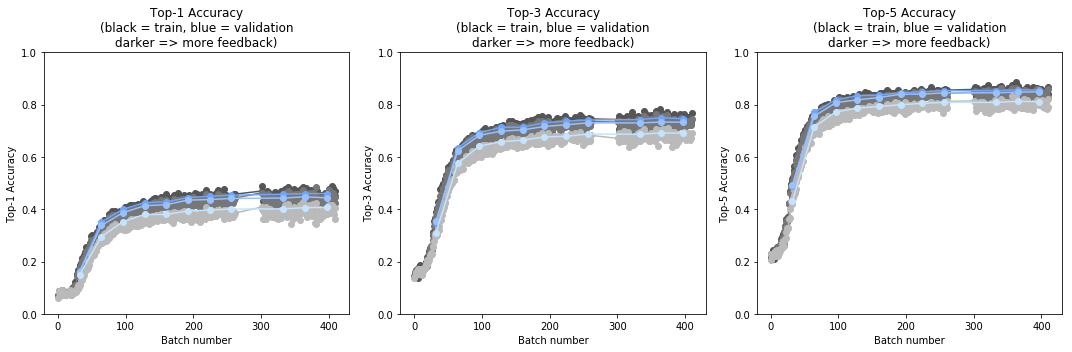

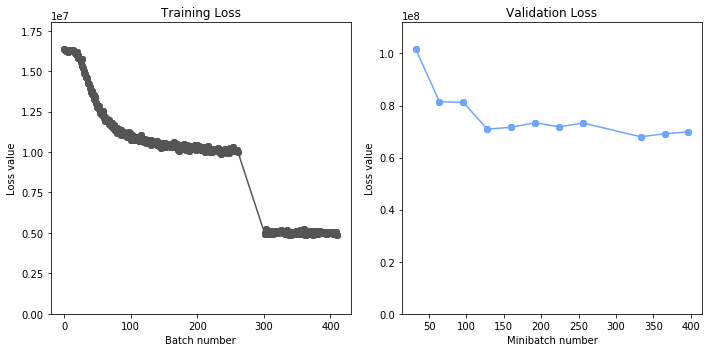

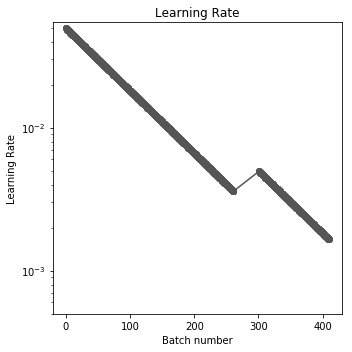

In [651]:
# Name: model17
header, data = get_data(os.path.join(EXPERIMENT_DIR, '20bn/vfeedbacknet_model17.gce', 'training_log.csv'))
plot_accuracy(data, num_feedback=3, ylim=1)
plot_loss(data)
plot_learning_rate(data)

batch_num, epoch, global_step, learning_rate, feedback_iteration, train_acc_top1, train_acc_top3, train_acc_top5, train_loss, valid_acc_top1, valid_acc_top3, valid_acc_top5, valid_loss, checkpoint_path, model_export_path
batch: 58


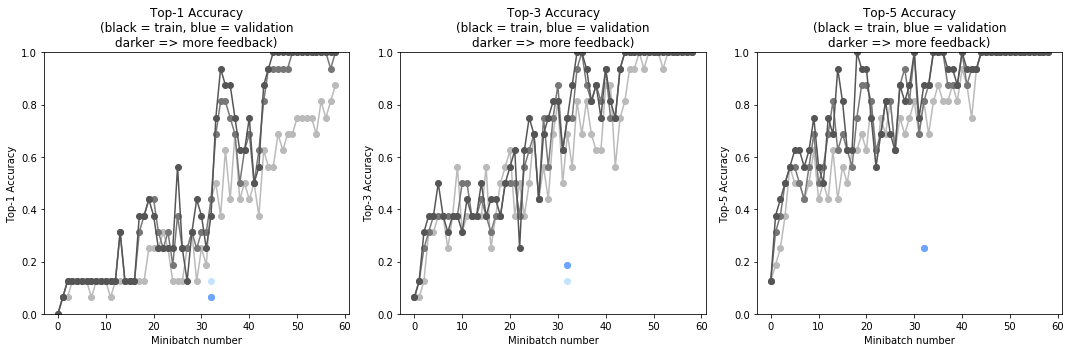

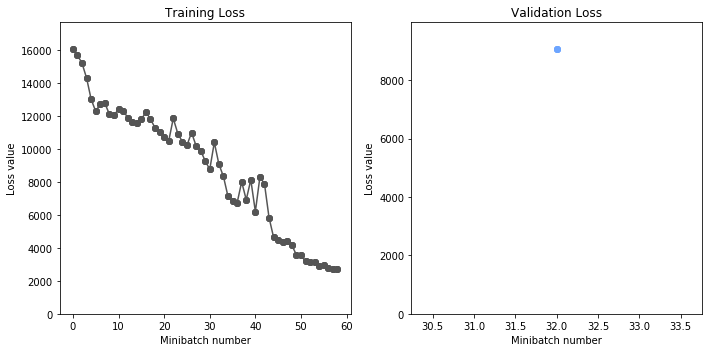

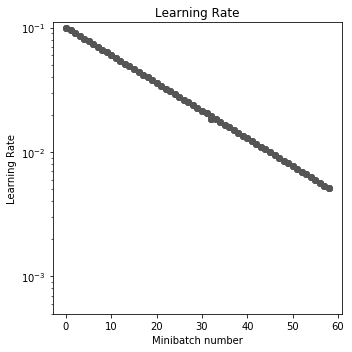

In [294]:
# Name: model17
header, data = get_data(os.path.join(EXPERIMENT_DIR, '20bn/vfeedbacknet_model17.overfit', 'training_log.csv'))
plot_accuracy(data, num_feedback=3, ylim=1)
plot_loss(data)
plot_learning_rate(data)

bn, epoch, step, lr, fb, tr1, tr3, tr5, trL, te1, te3, te5, teL
1809, 9, 22255.0, 9.999999747378752e-06, 0, 0.5068359375, 0.81494140625, 0.8994140625, 14603119.75, , , , , ,
1809, 9, 22255.0, 9.999999747378752e-06, 1, 0.64794921875, 0.88720703125, 0.94189453125, 14603119.75, , , , , ,
1809, 9, 22255.0, 9.999999747378752e-06, 2, 0.6787109375, 0.90380859375, 0.94921875, 14603119.75, , , , , ,
1810, 9, 22263.0, 9.999999747378752e-06, 0, 0.5224609375, 0.82763671875, 0.900390625, 14108788.875, , , , , ,
1810, 9, 22263.0, 9.999999747378752e-06, 1, 0.666015625, 0.90234375, 0.94482421875, 14108788.875, , , , , ,
1810, 9, 22263.0, 9.999999747378752e-06, 2, 0.693359375, 0.9150390625, 0.95703125, 14108788.875, , , , , ,
1811, 9, 22271.0, 9.999999747378752e-06, 0, 0.5205078125, 0.82470703125, 0.9033203125, 14311109.75, , , , , ,
1811, 9, 22271.0, 9.999999747378752e-06, 1, 0.66552734375, 0.8896484375, 0.9375, 14311109.75, , , , , ,
1811, 9, 22271.0, 9.999999747378752e-06, 2, 0.7021484375, 0.9057617

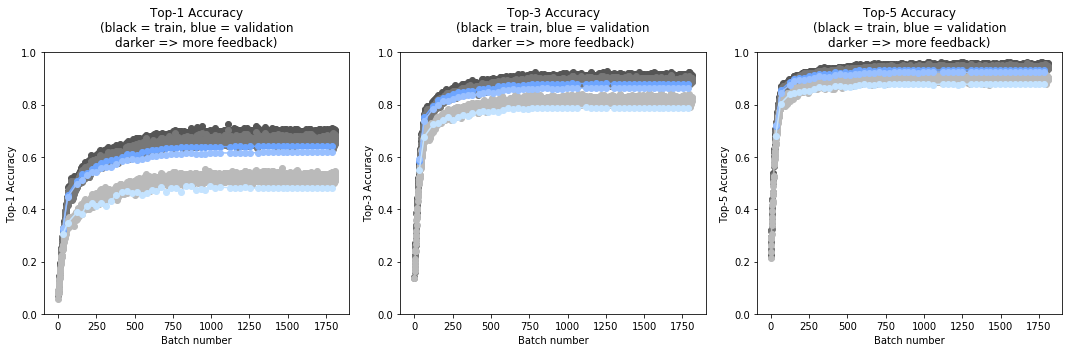

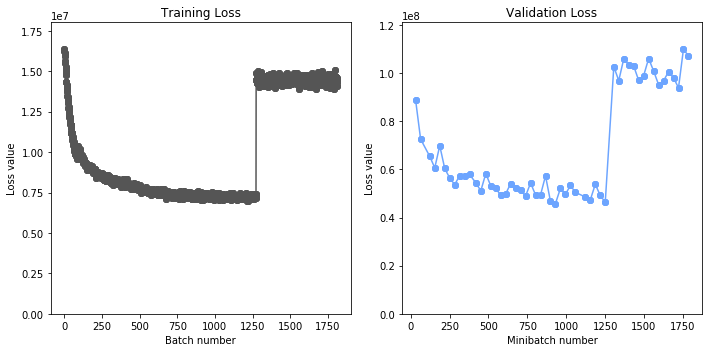

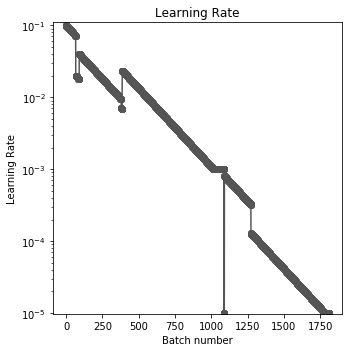

In [652]:
# Name: model16
header, data = get_data(os.path.join(EXPERIMENT_DIR, '20bn/vfeedbacknet_model16.gce', 'training_log.csv'))
plot_accuracy(data, num_feedback=3, ylim=1)
plot_loss(data)
plot_learning_rate(data)

bn, epoch, step, lr, fb, tr1, tr3, tr5, trL, te1, te3, te5, teL
972, 5, 9569.0, 0.0010000000474974513, 0, 0.32592592592592595, 0.575, 0.6888888888888889, 3890870.671875, , , , , ,
972, 5, 9569.0, 0.0010000000474974513, 1, 0.3398148148148148, 0.587037037037037, 0.7037037037037037, 3890870.671875, , , , , ,
972, 5, 9569.0, 0.0010000000474974513, 2, 0.3425925925925926, 0.587037037037037, 0.7027777777777777, 3890870.671875, , , , , ,
973, 5, 9584.0, 0.0010000000474974513, 0, 0.32037037037037036, 0.5842592592592593, 0.7, 3947866.171875, , , , , ,
973, 5, 9584.0, 0.0010000000474974513, 1, 0.31851851851851853, 0.5925925925925926, 0.7055555555555556, 3947866.171875, , , , , ,
973, 5, 9584.0, 0.0010000000474974513, 2, 0.31574074074074077, 0.5898148148148148, 0.7, 3947866.171875, , , , , ,
974, 5, 9599.0, 0.0010000000474974513, 0, 0.31574074074074077, 0.549074074074074, 0.6907407407407408, 3898998.5, , , , , ,
974, 5, 9599.0, 0.0010000000474974513, 1, 0.32685185185185184, 0.562037037037037, 0.69

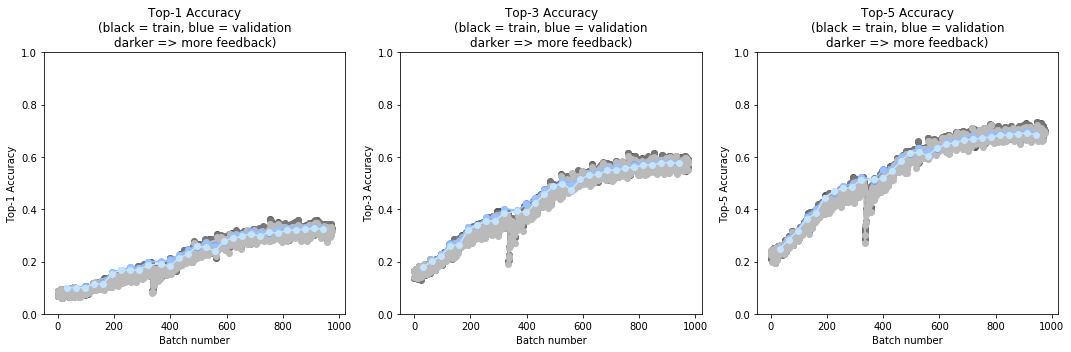

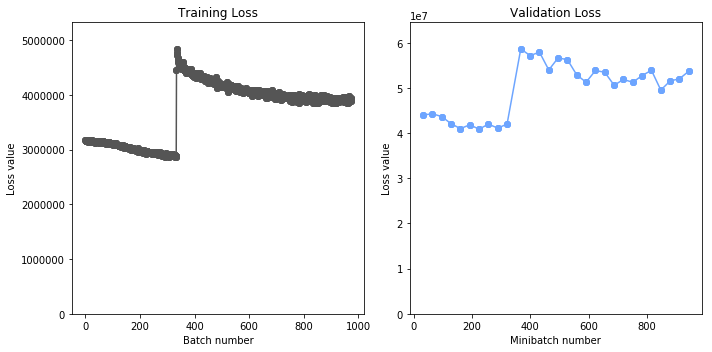

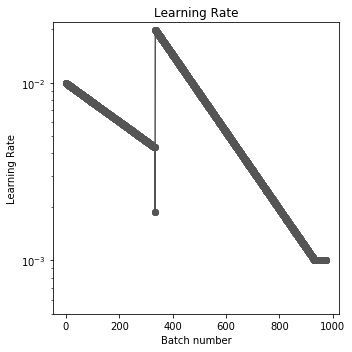

In [653]:
# Name: model15
header, data = get_data(os.path.join(EXPERIMENT_DIR, '20bn/vfeedbacknet_model15', 'training_log.csv'))
plot_accuracy(data, num_feedback=3, ylim=1)
plot_loss(data)
plot_learning_rate(data)

batch_num, epoch, global_step, learning_rate, feedback_iteration, train_acc_top1, train_acc_top3, train_acc_top5, train_loss, valid_acc_top1, valid_acc_top3, valid_acc_top5, valid_loss, checkpoint_path, model_export_path
batch: 114


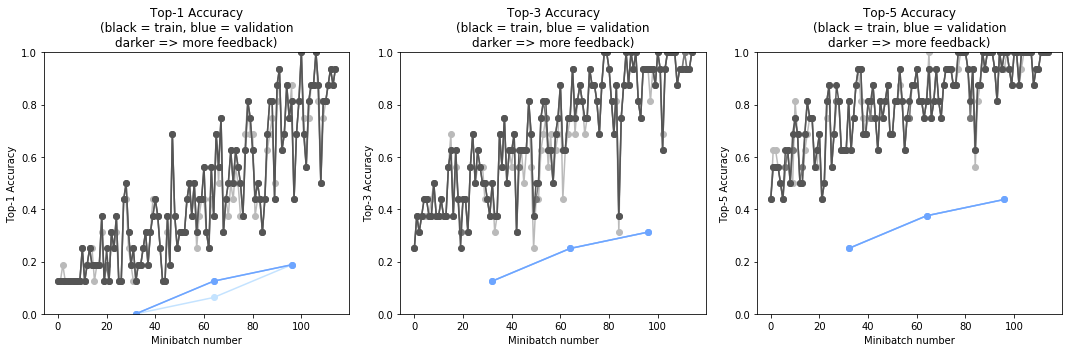

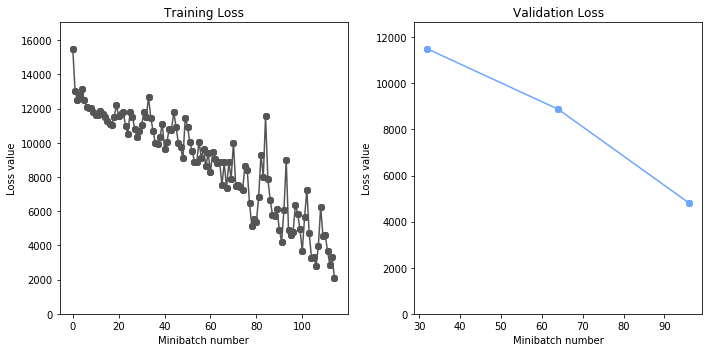

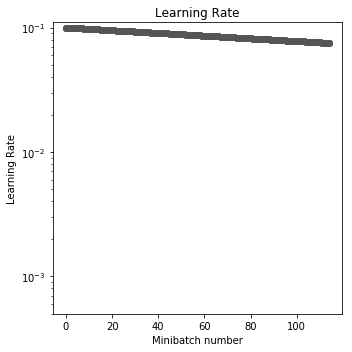

In [219]:
# Name: model15
header, data = get_data(os.path.join(EXPERIMENT_DIR, '20bn/vfeedbacknet_model15.overfit', 'training_log.csv'))
plot_accuracy(data, num_feedback=3, ylim=1)
plot_loss(data)
plot_learning_rate(data)

batch_num, epoch, global_step, learning_rate, feedback_iteration, train_acc_top1, train_acc_top3, train_acc_top5, train_loss, valid_acc_top1, valid_acc_top3, valid_acc_top5, valid_loss, checkpoint_path, model_export_path
batch: 51


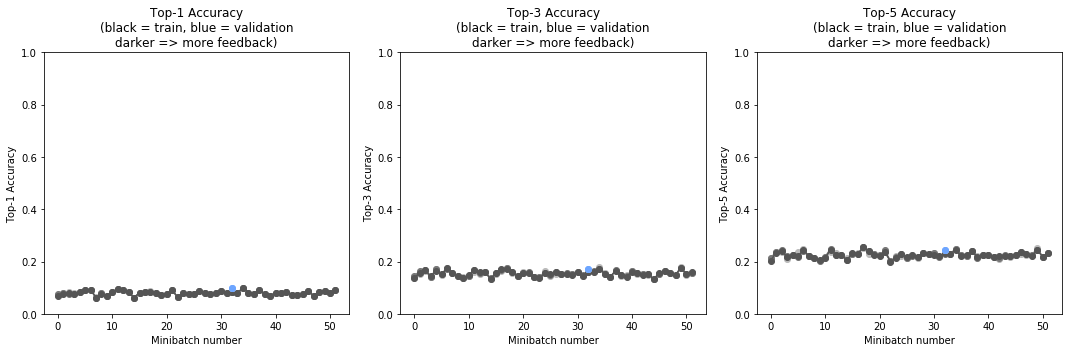

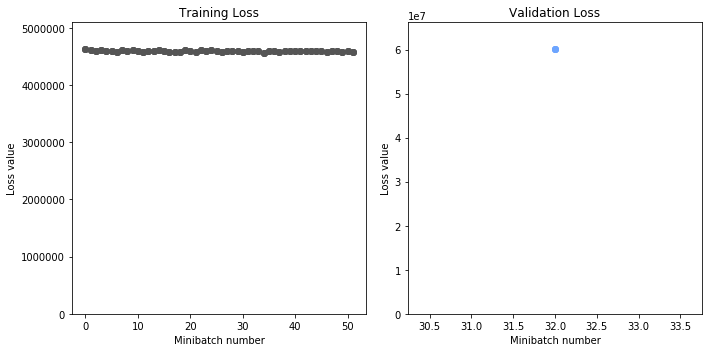

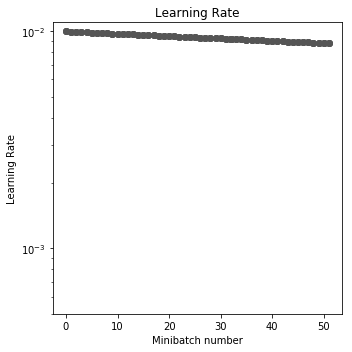

In [220]:
# Name: model14
header, data = get_data(os.path.join(EXPERIMENT_DIR, '20bn/vfeedbacknet_model14.gce', 'training_log.csv'))
plot_accuracy(data, num_feedback=3, ylim=1)
plot_loss(data)
plot_learning_rate(data)

bn, epoch, step, lr, fb, tr1, tr3, tr5, trL, te1, te3, te5, teL
770, 6, 8481, 0.014519407413899899, 0, 0.8200757575757576, 0.946969696969697, 0.9763257575757576, 2460908.703125, , , , , ,
770, 6, 8481, 0.014519407413899899, 1, 0.8210227272727273, 0.9517045454545454, 0.9763257575757576, 2460908.703125, , , , , ,
770, 6, 8481, 0.014519407413899899, 2, 0.821969696969697, 0.9517045454545454, 0.9753787878787878, 2460908.703125, , , , , ,
771, 6, 8492, 0.014483108185231686, 0, 0.8295454545454546, 0.9507575757575758, 0.9753787878787878, 2390602.546875, , , , , ,
771, 6, 8492, 0.014483108185231686, 1, 0.8399621212121212, 0.9554924242424242, 0.9772727272727273, 2390602.546875, , , , , ,
771, 6, 8492, 0.014483108185231686, 2, 0.84375, 0.9583333333333334, 0.978219696969697, 2390602.546875, , , , , ,
772, 6, 8503, 0.01444690115749836, 0, 0.8106060606060606, 0.9517045454545454, 0.9734848484848485, 2482447.375, , , , , ,
772, 6, 8503, 0.01444690115749836, 1, 0.8125, 0.9583333333333334, 0.97632575757

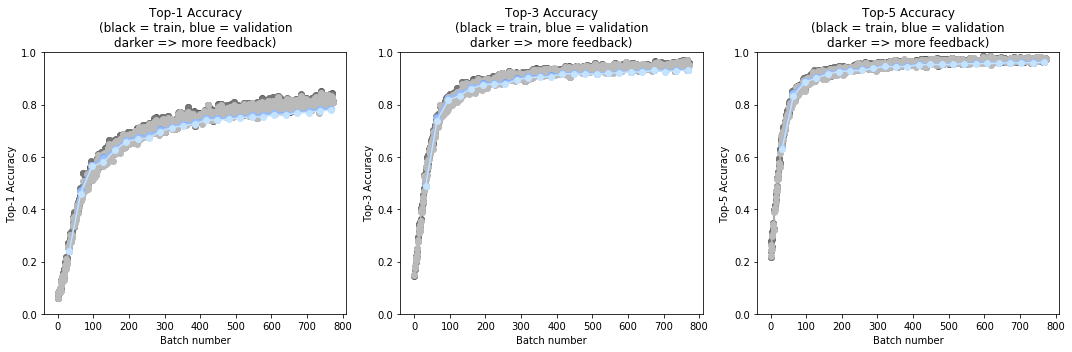

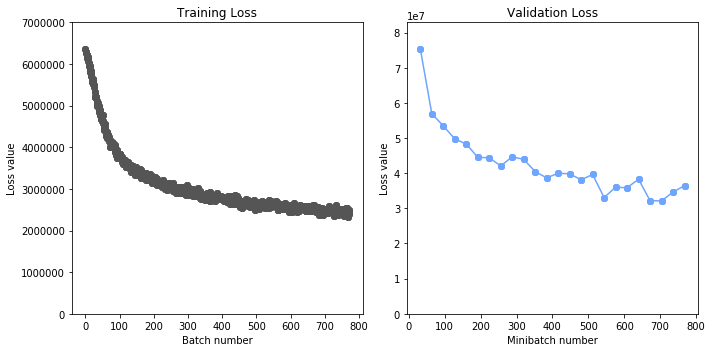

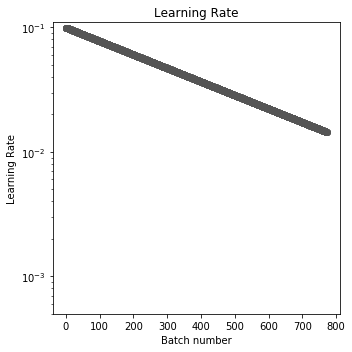

In [227]:
# Name: model13
header, data = get_data(os.path.join(EXPERIMENT_DIR, '20bn/vfeedbacknet_model13', 'training_log.csv'))
plot_accuracy(data, num_feedback=3, ylim=1)
plot_loss(data)
plot_learning_rate(data)

batch_num, epoch, global_step, learning_rate, feedback_iteration, train_acc_top1, train_acc_top3, train_acc_top5, train_loss, valid_acc_top1, valid_acc_top3, valid_acc_top5, valid_loss, checkpoint_path, model_export_path
batch: 579


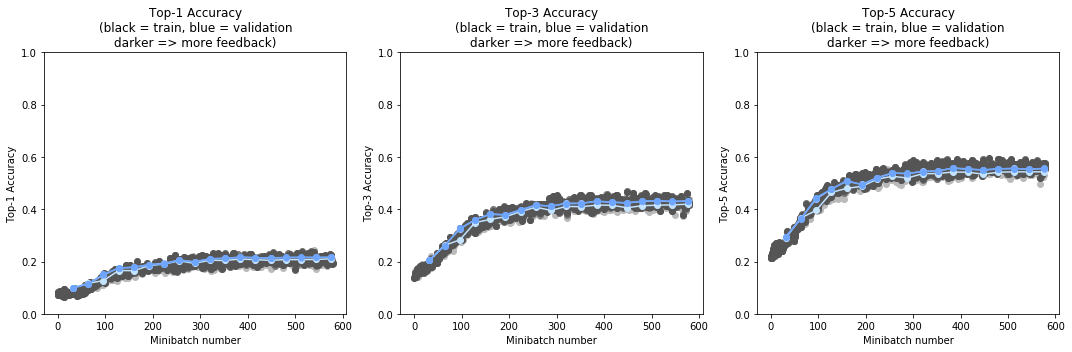

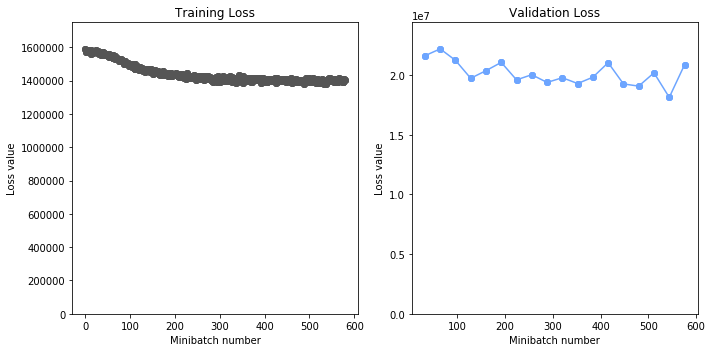

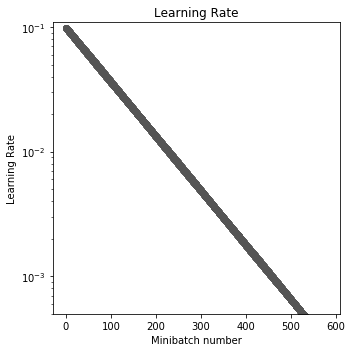

In [50]:
# Name: model8
header, data = get_data(os.path.join(EXPERIMENT_DIR, '20bn/vfeedbacknet_model8', 'training_log.csv'))
plot_accuracy(data, num_feedback=3, ylim=1)
plot_loss(data)
plot_learning_rate(data)

batch_num, epoch, global_step, learning_rate, feedback_iteration, train_acc_top1, train_acc_top3, train_acc_top5, train_loss, valid_acc_top1, valid_acc_top3, valid_acc_top5, valid_loss, checkpoint_path, model_export_path
batch: 20


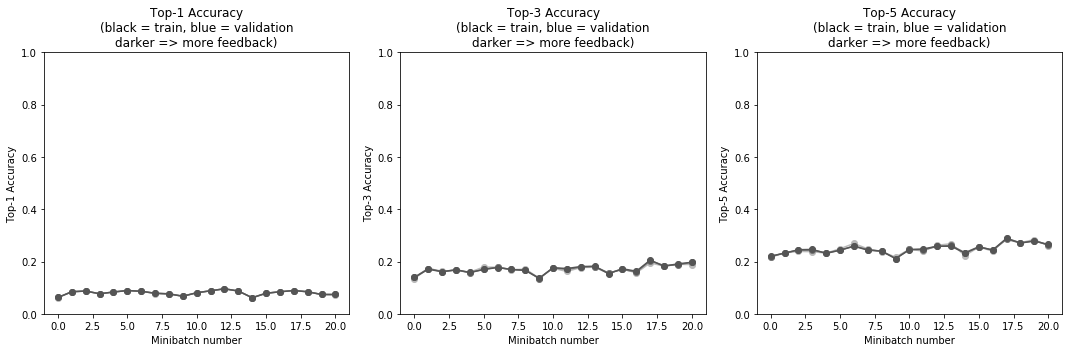

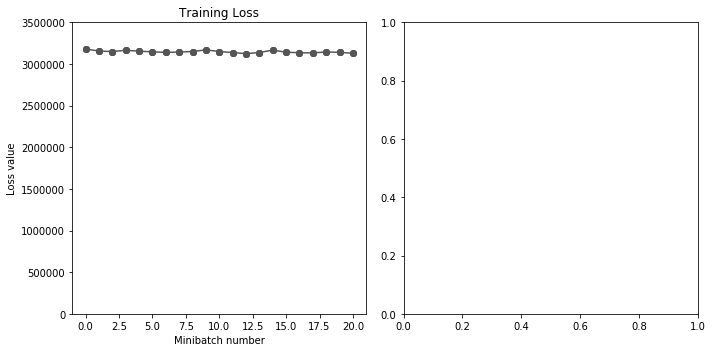

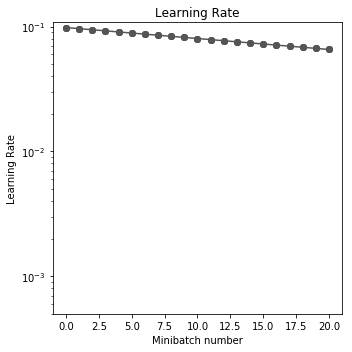

In [311]:
# Name: model7
header, data = get_data(os.path.join(EXPERIMENT_DIR, 'vfeedbacknet_model7', 'training_log.csv'))
plot_accuracy(data, num_feedback=3, ylim=1)
plot_loss(data)
plot_learning_rate(data)

batch_num, epoch, global_step, learning_rate, feedback_iteration, train_acc_top1, train_acc_top3, train_acc_top5, train_loss, valid_acc_top1, valid_acc_top3, valid_acc_top5, valid_loss, checkpoint_path, model_export_path
batch: 19


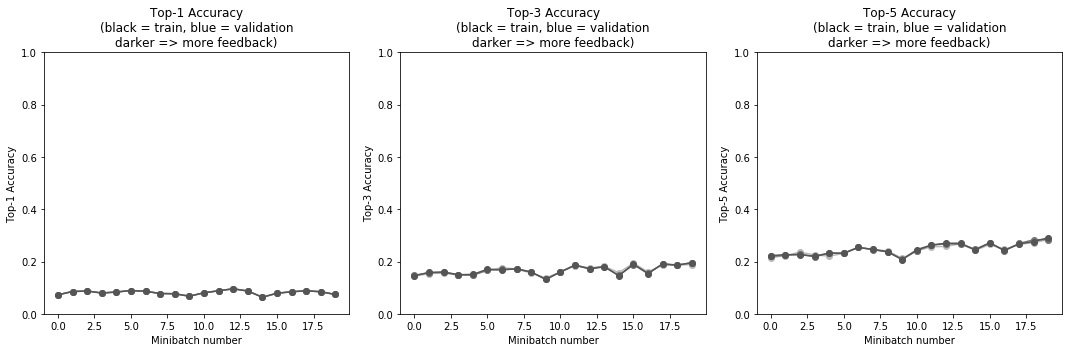

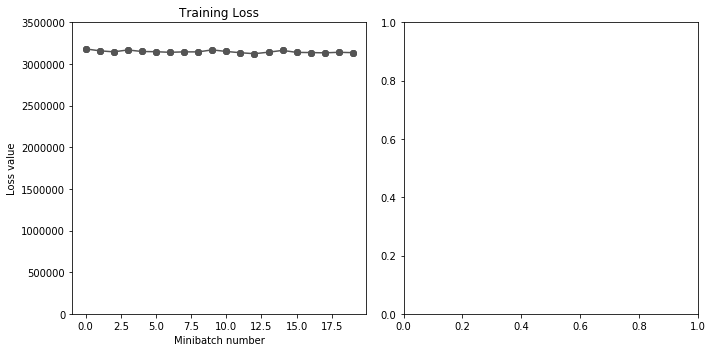

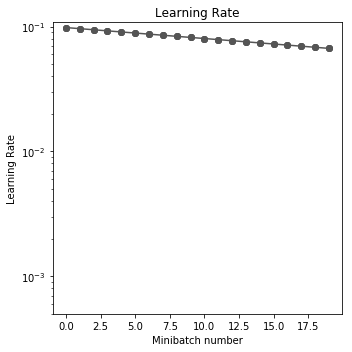

In [309]:
# Name: model6
# VGG16 preprocess conv layer is now more reasonable (3x3x512 conv)
header, data = get_data(os.path.join(EXPERIMENT_DIR, '20bn/vfeedbacknet_model6', 'training_log.csv'))
plot_accuracy(data, num_feedback=3, ylim=1)
plot_loss(data)
plot_learning_rate(data)

batch_num, epoch, global_step, learning_rate, feedback_iteration, train_acc_top1, train_acc_top3, train_acc_top5, train_loss, valid_acc_top1, valid_acc_top3, valid_acc_top5, valid_loss, checkpoint_path, model_export_path
batch: 130


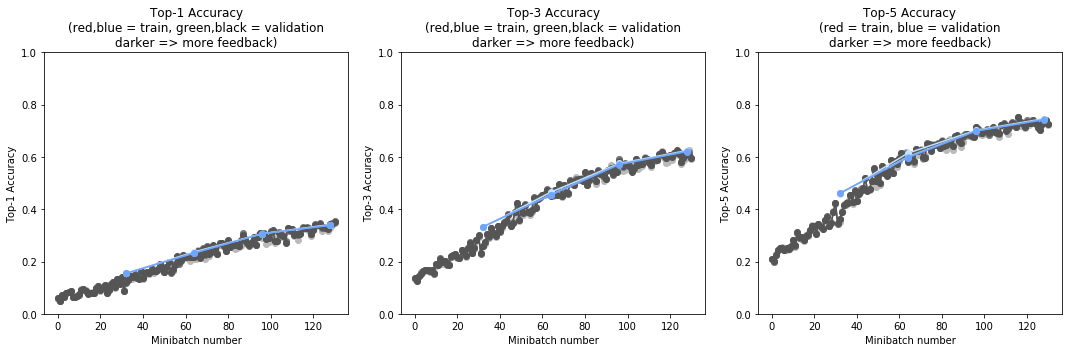

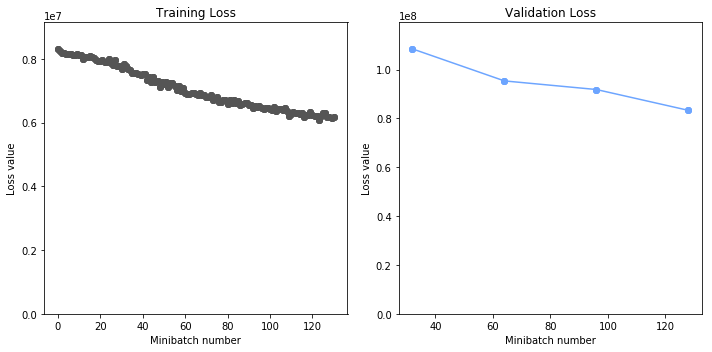

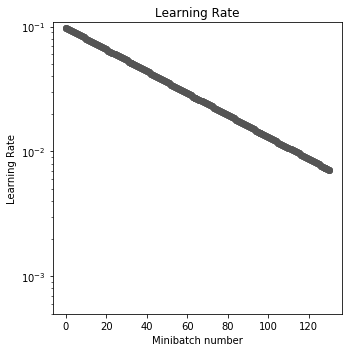

In [73]:
# Name: model5.last_loss_multipler
# Summary: pretrained VGG16 features feed into lstm-based feedback network with last iteration loss-boost
header, data = get_data(os.path.join(EXPERIMENT_DIR, '20bn/vfeedbacknet_model5.last_loss_multipler', 'training_log.csv'))
plot_accuracy(data, num_feedback=3, ylim=1)
plot_loss(data)youtube
plot_learning_rate(data)

batch_num, epoch, global_step, learning_rate, feedback_iteration, train_acc_top1, train_acc_top3, train_acc_top5, train_loss, valid_acc_top1, valid_acc_top3, valid_acc_top5, valid_loss, checkpoint_path, model_export_path
batch: 188


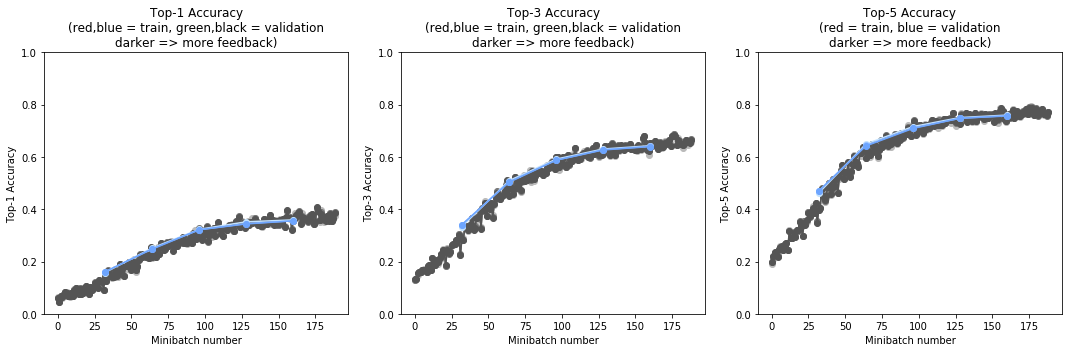

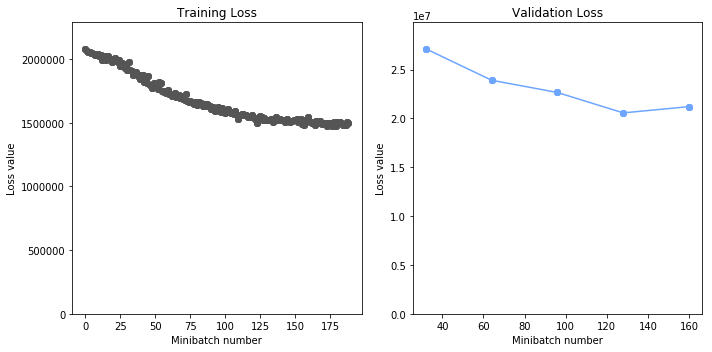

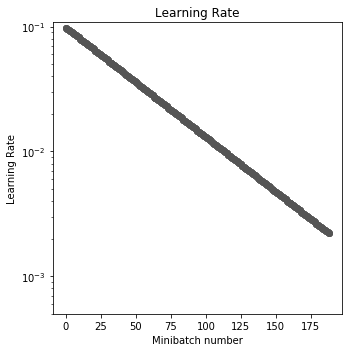

In [72]:
# Name: model5
# Summary: pretrained VGG16 features feed into lstm-based feedback network (without last iteration loss-boost)
header, data = get_data(os.path.join(EXPERIMENT_DIR, '20bn/vfeedbacknet_model5', 'training_log.csv'))
plot_accuracy(data, num_feedback=3, ylim=1)
plot_loss(data)
plot_learning_rate(data)

batch_num, epoch, global_step, learning_rate, feedback_iteration, train_acc_top1, train_acc_top3, train_acc_top5, train_loss, valid_acc_top1, valid_acc_top3, valid_acc_top5, valid_loss, checkpoint_path, model_export_path
batch: 209


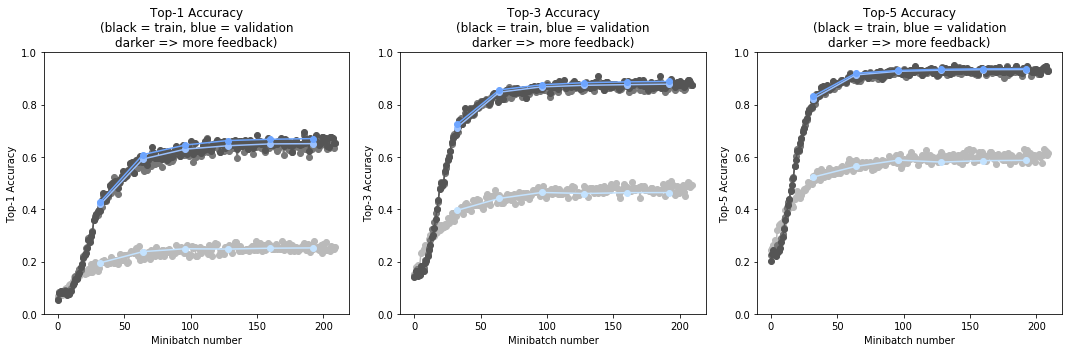

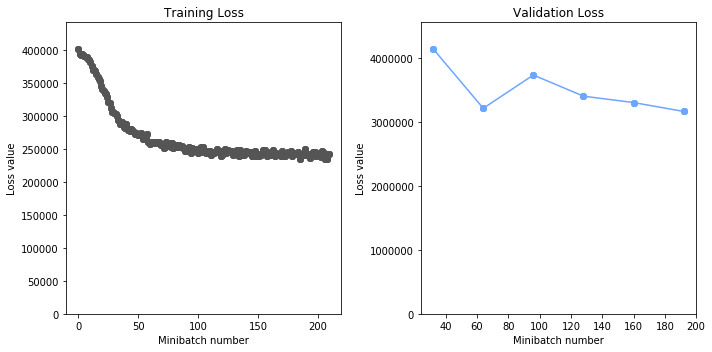

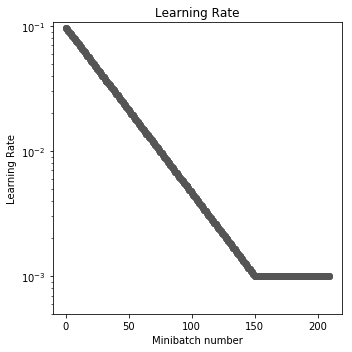

In [307]:
# Name: model4
# Summary: pretrained VGG16 features feed into simple deconv + convLSTM feedback mechanism
header, data = get_data(os.path.join(EXPERIMENT_DIR, '20bn/vfeedbacknet_model4', 'training_log.csv'))
plot_accuracy(data, num_feedback=3, ylim=1)
plot_loss(data)
plot_learning_rate(data)

batch_num, epoch, global_step, learning_rate, feedback_iteration, train_acc_top1, train_acc_top3, train_acc_top5, train_loss, valid_acc_top1, valid_acc_top3, valid_acc_top5, valid_loss, checkpoint_path, model_export_path
batch: 347


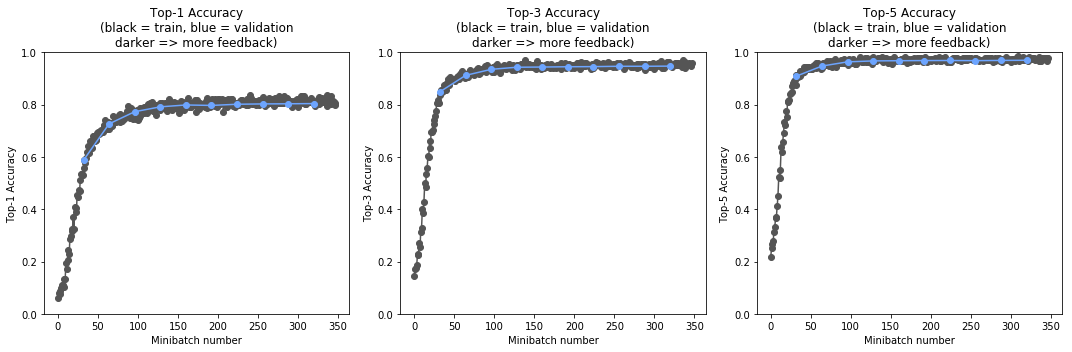

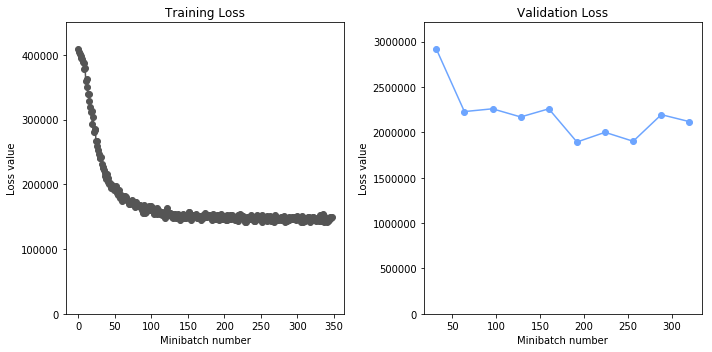

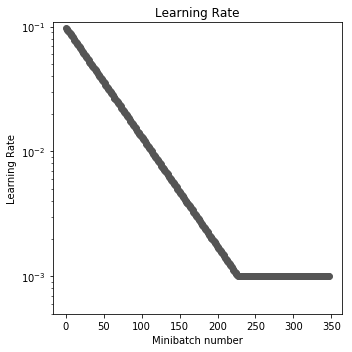

In [299]:
header, data = get_data(os.path.join(EXPERIMENT_DIR, '20bn/vfeedbacknet_model1.recheck4', 'training_log.csv'))
plot_accuracy(data, ylim=1)
plot_loss(data)
plot_learning_rate(data)

batch_num, epoch, global_step, learning_rate, feedback_iteration, train_acc_top1, train_acc_top3, train_acc_top5, train_loss, valid_acc_top1, valid_acc_top3, valid_acc_top5, valid_loss, checkpoint_path, model_export_path
batch: 220


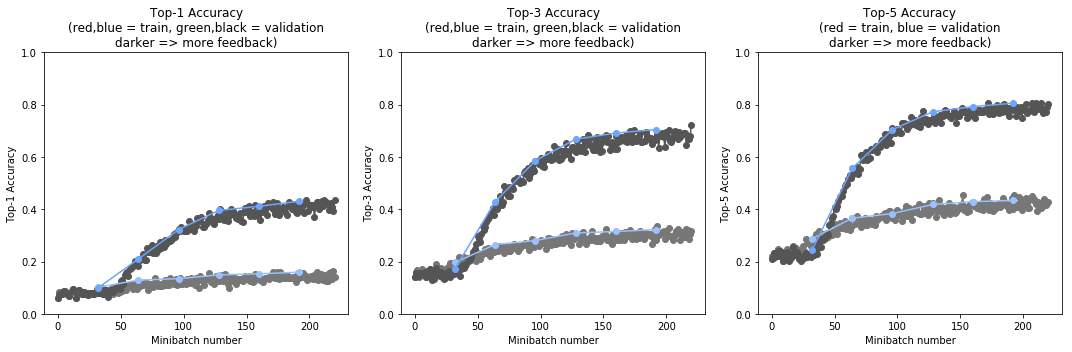

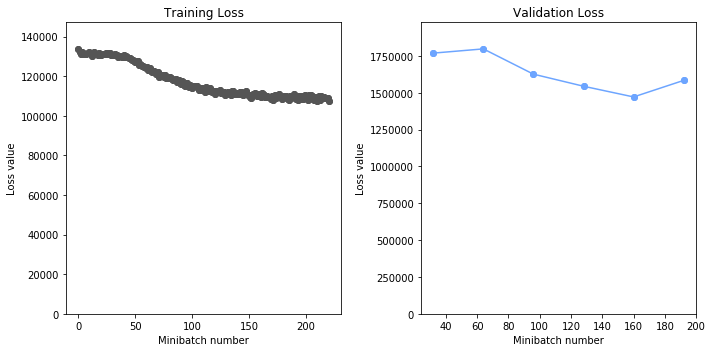

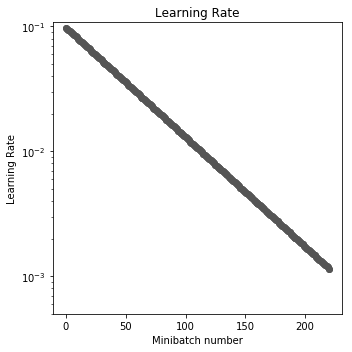

In [285]:
header, data = get_data(os.path.join(EXPERIMENT_DIR, '20bn/vfeedbacknet_model3.recheck1', 'training_log.csv'))
plot_accuracy(data, num_feedback=2, ylim=1)
plot_loss(data)
plot_learning_rate(data)

batch_num, epoch, global_step, learning_rate, feedback_iteration, train_acc_top1, train_acc_top3, train_acc_top5, train_loss, valid_acc_top1, valid_acc_top3, valid_acc_top5, valid_loss, checkpoint_path, model_export_path
batch: 321


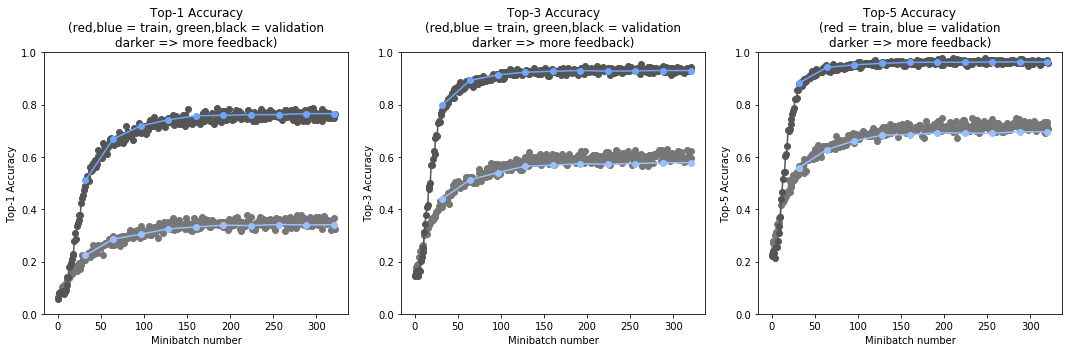

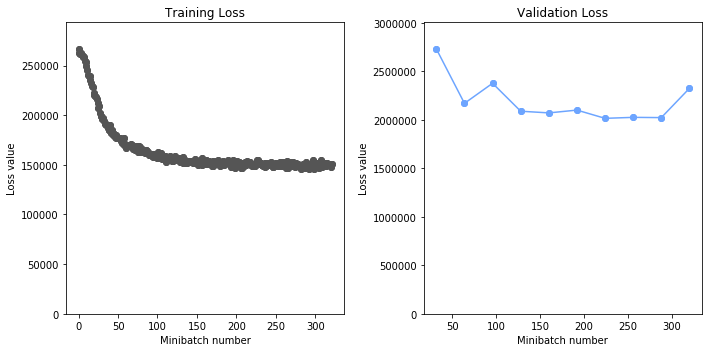

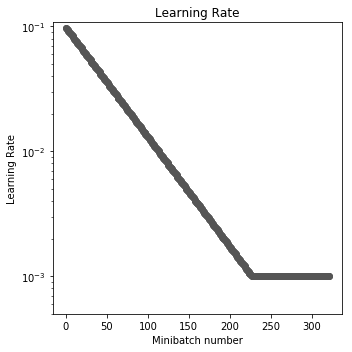

In [286]:
header, data = get_data(os.path.join(EXPERIMENT_DIR, '20bn/vfeedbacknet_model2.recheck1', 'training_log.csv'))
plot_accuracy(data, num_feedback=2, ylim=1)
plot_loss(data)
plot_learning_rate(data)

bn, epoch, step, lr, fb, tr1, tr3, tr5, trL, te1, te3, te5, teL
376, 3, 24128, 0.0010000000474974513, 0, 0.8876953125, 0.970703125, 0.9833984375, 25133.836029052734, , , , , ,
377, 3, 24192, 0.0010000000474974513, 0, 0.853515625, 0.962890625, 0.9765625, 26990.014938354492, , , , , ,
378, 3, 24256, 0.0010000000474974513, 0, 0.8701171875, 0.96875, 0.982421875, 26273.246185302734, , , , , ,
379, 3, 24320, 0.0010000000474974513, 0, 0.880859375, 0.978515625, 0.9853515625, 25068.31915283203, , , , , ,
380, 3, 24384, 0.0010000000474974513, 0, 0.85546875, 0.9599609375, 0.9833984375, 26523.29180908203, , , , , ,
381, 3, 24448, 0.0010000000474974513, 0, 0.87109375, 0.974609375, 0.990234375, 25687.644638061523, , , , , ,
382, 3, 24512, 0.0010000000474974513, 0, 0.87890625, 0.96875, 0.9853515625, 25899.201904296875, , , , , ,
383, 3, 24576, 0.0010000000474974513, 0, 0.8701171875, 0.970703125, 0.984375, 25986.48699951172, , , , , ,
384, 3, 24640, 0.0010000000474974513, 0, 0.8662109375, 0.9736328125

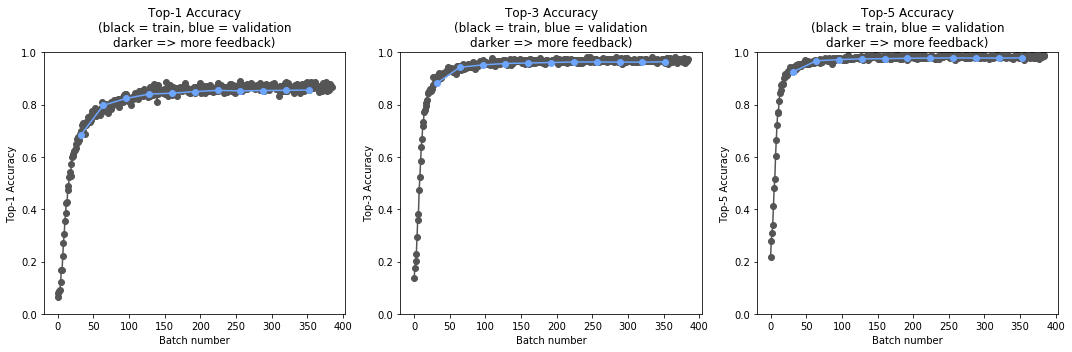

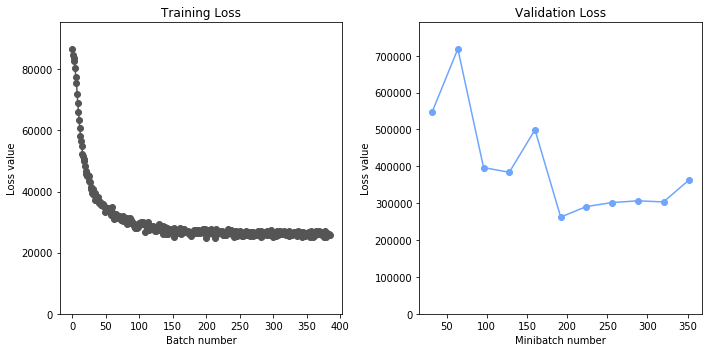

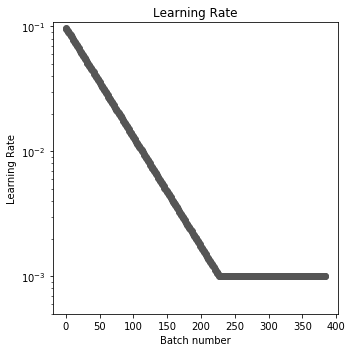

In [655]:
# name: model1
# VGG16 features feed into two-layer convLSTM
header, data = get_data(os.path.join(EXPERIMENT_DIR, '20bn/vfeedbacknet_model1.recheck3', 'training_log.csv'))
plot_accuracy(data, ylim=1)
plot_loss(data)
plot_learning_rate(data)